In [10]:
import scipy.stats as stats
import numpy as np
import statsmodels.stats.multicomp as multi
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

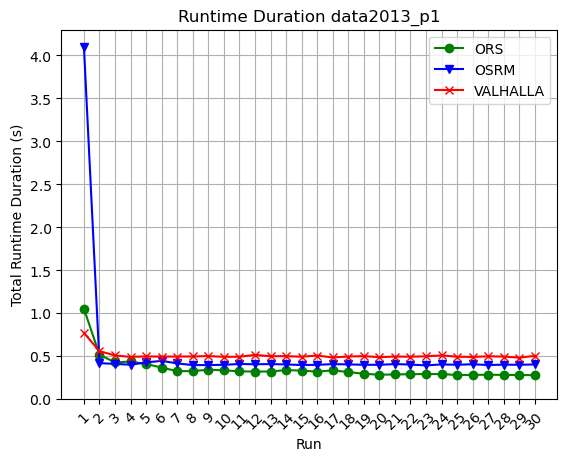

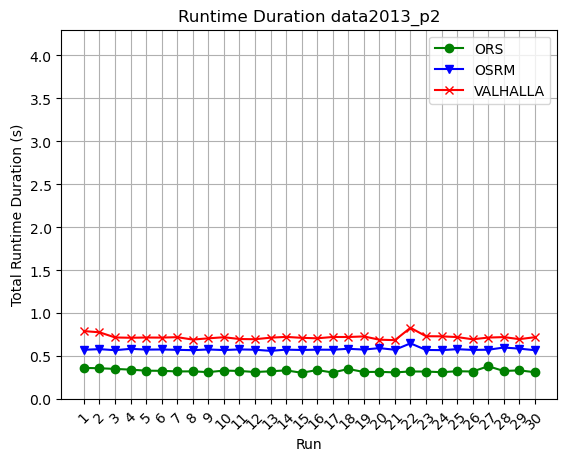

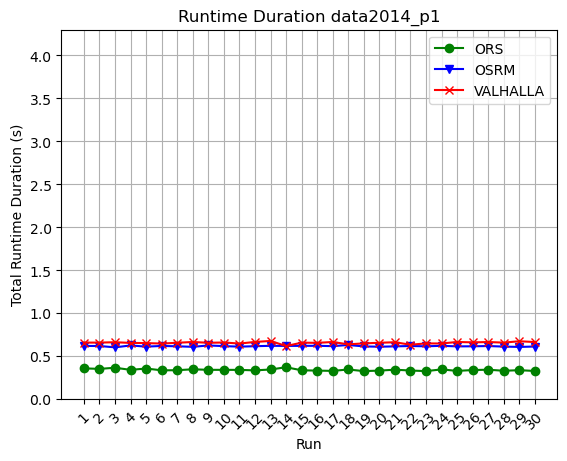

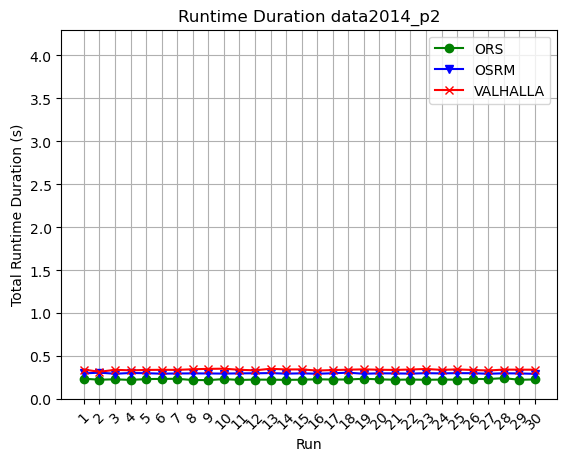

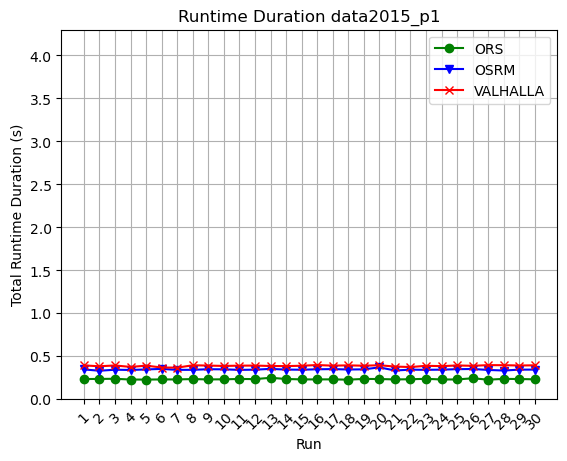

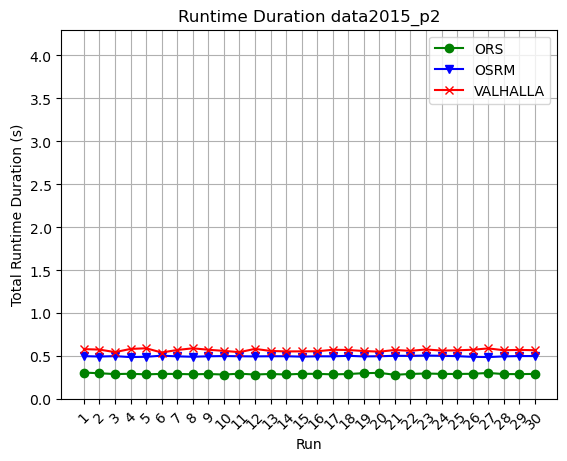

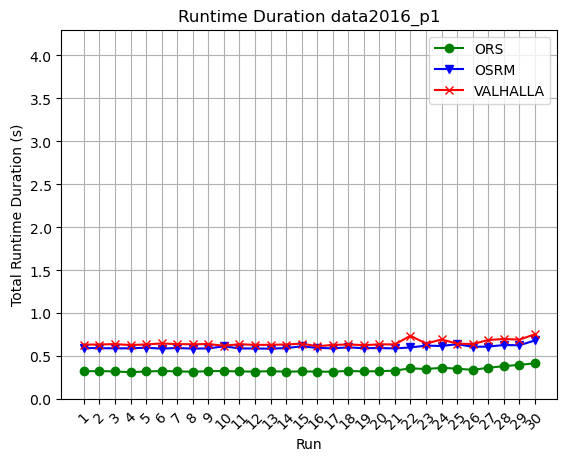

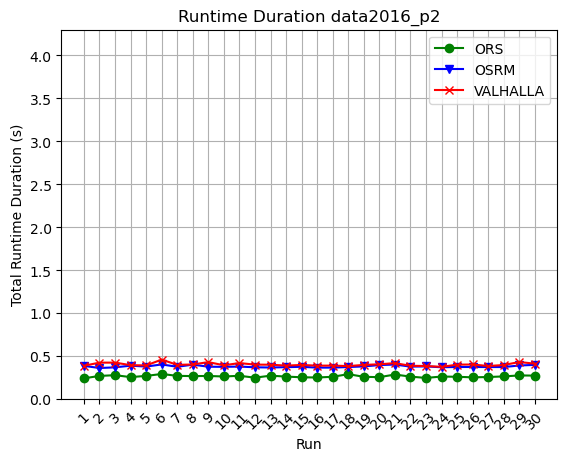

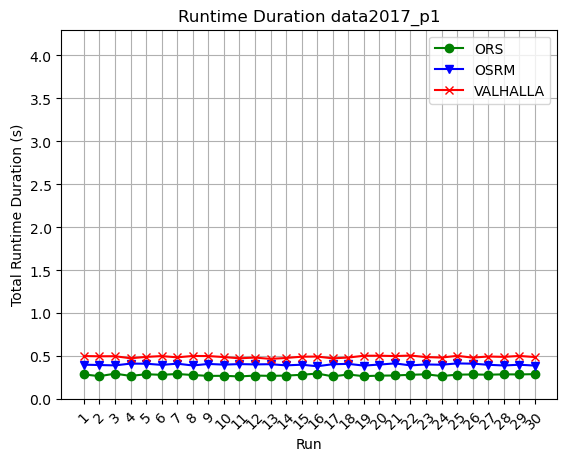

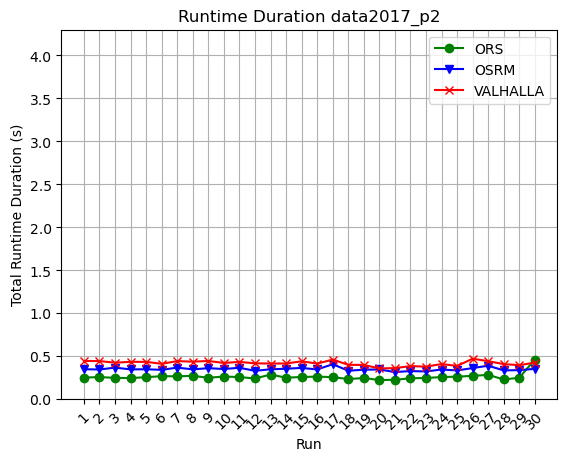

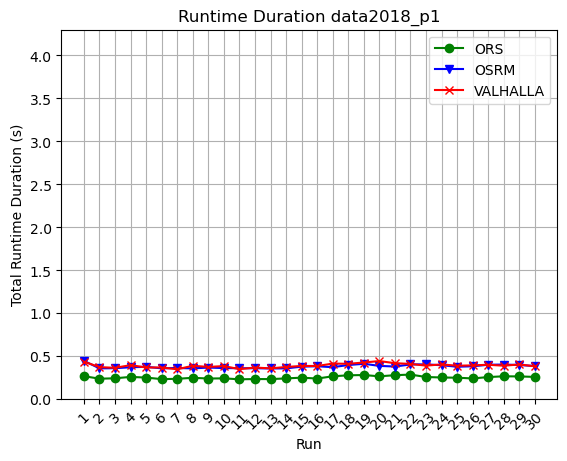

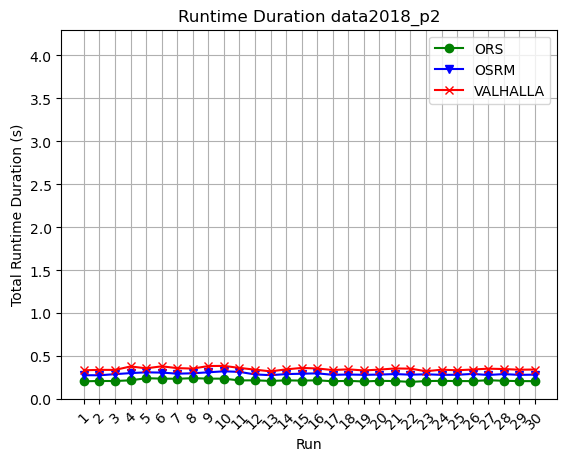

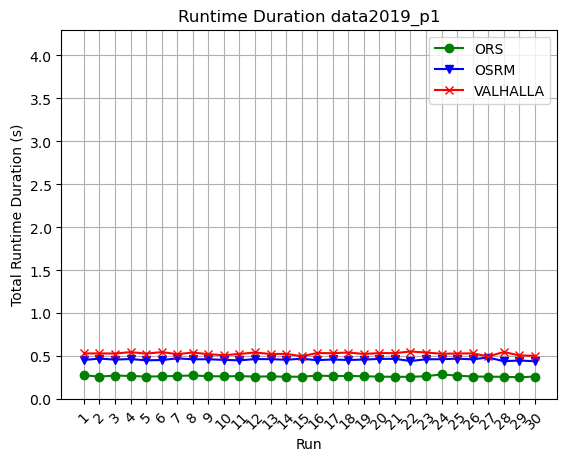

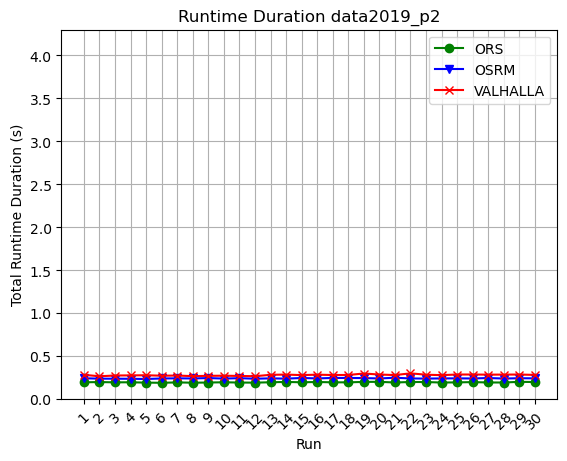

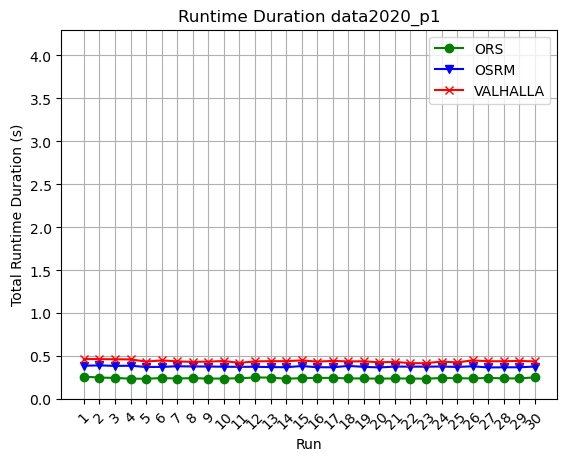

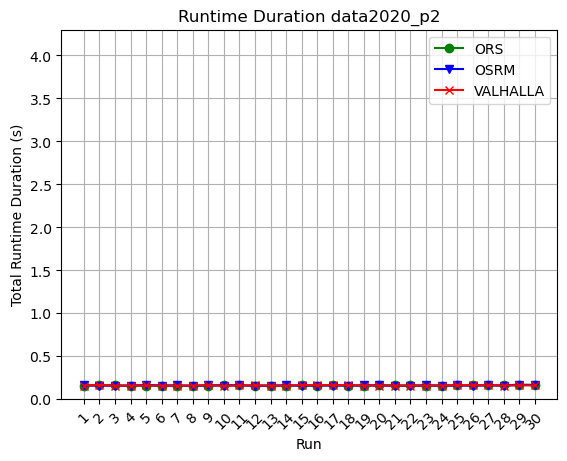

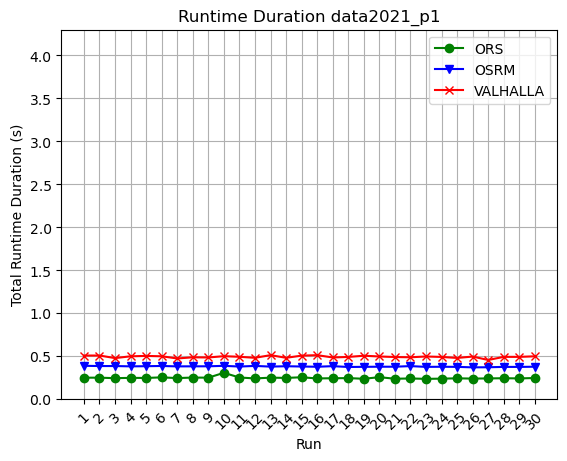

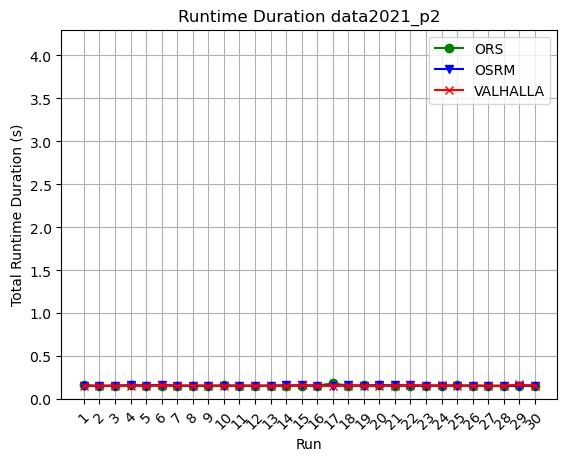

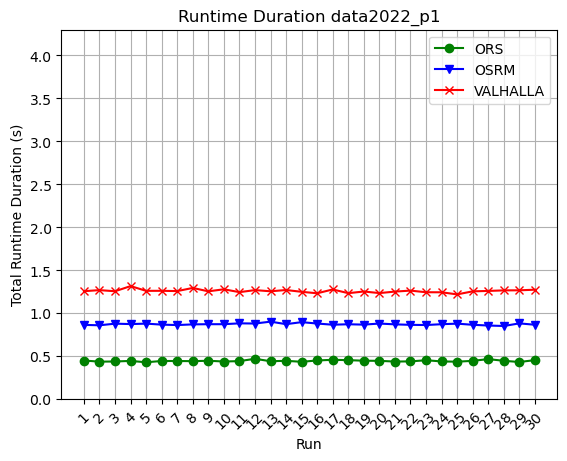

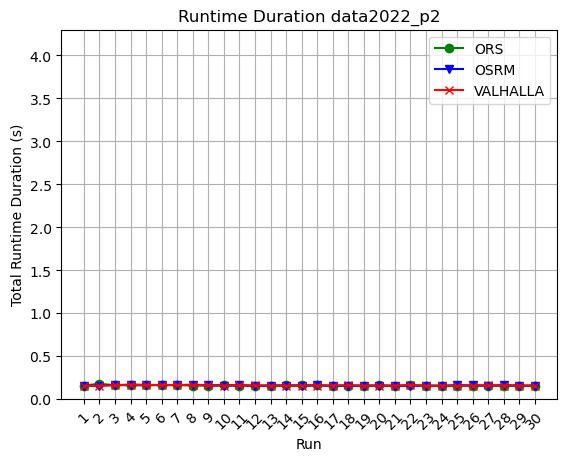

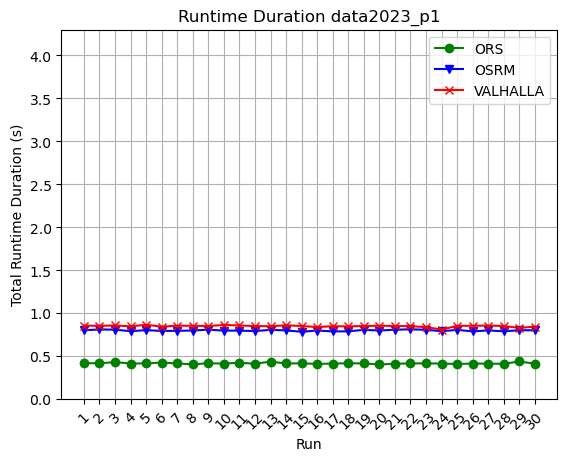

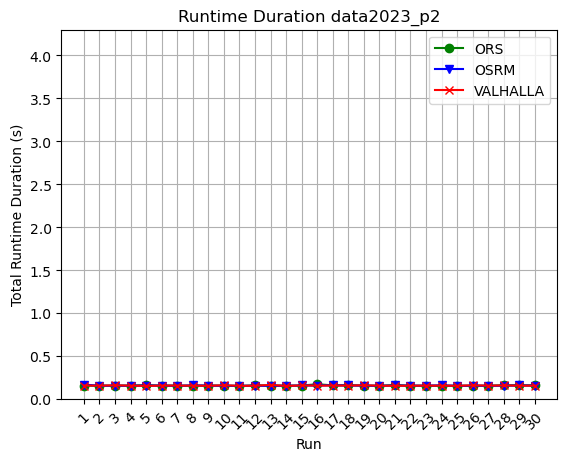

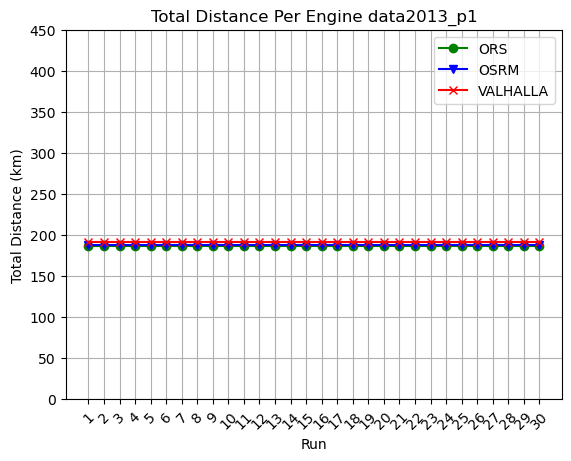

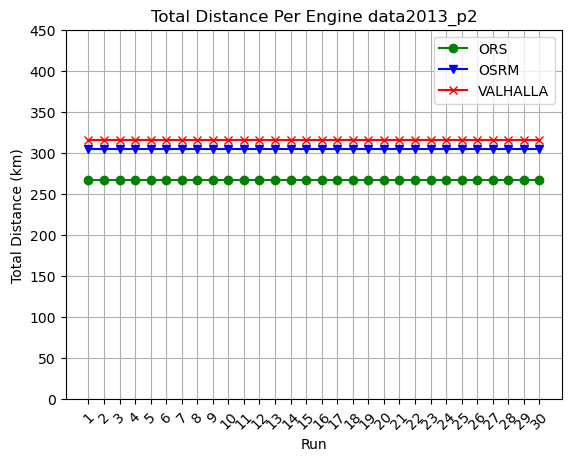

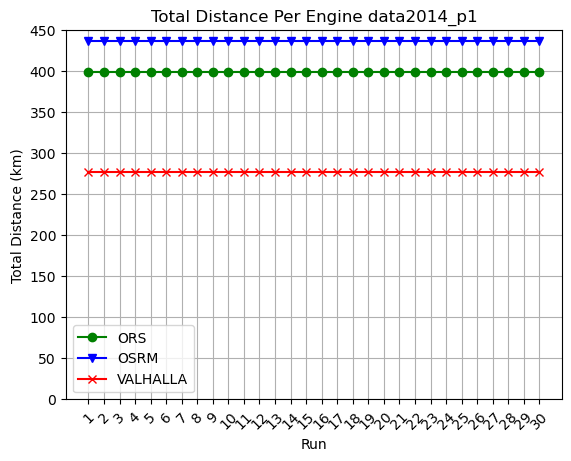

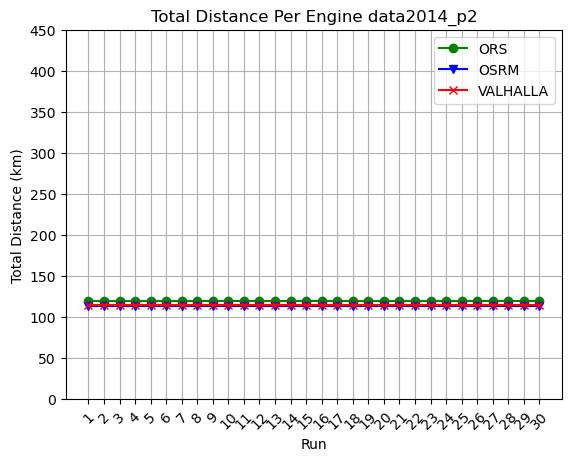

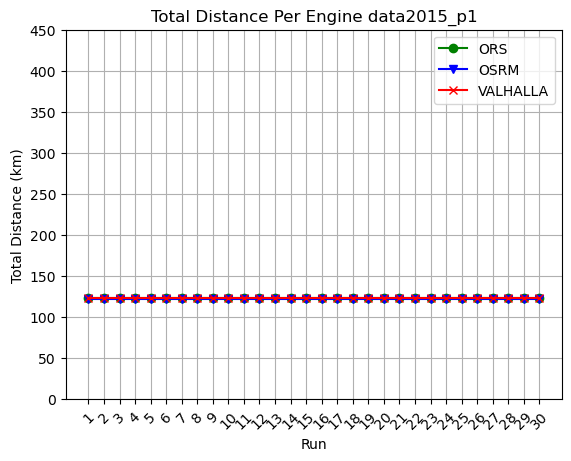

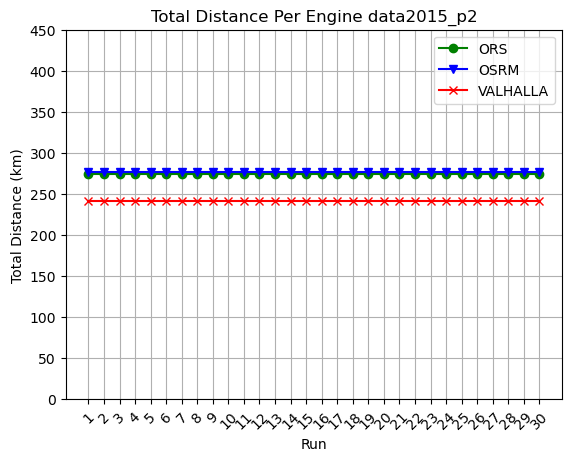

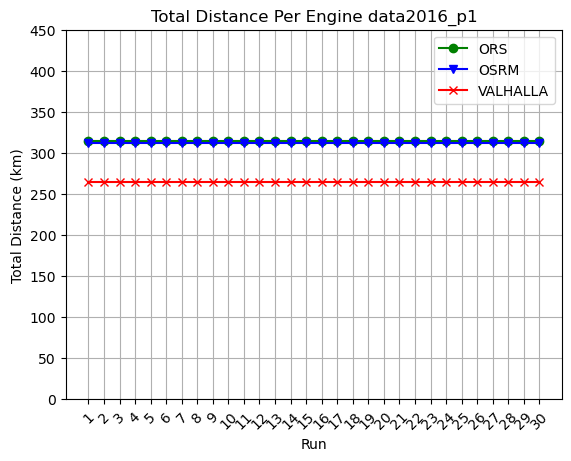

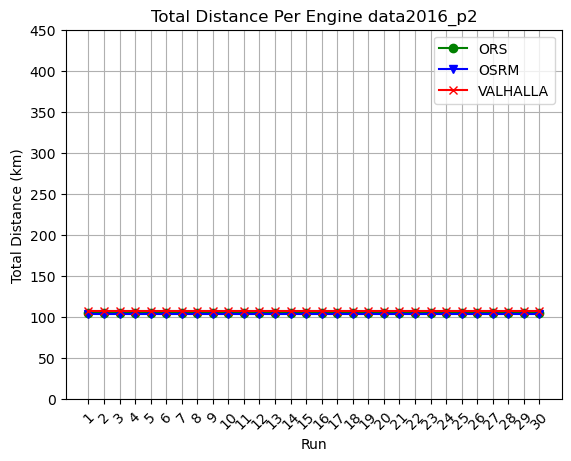

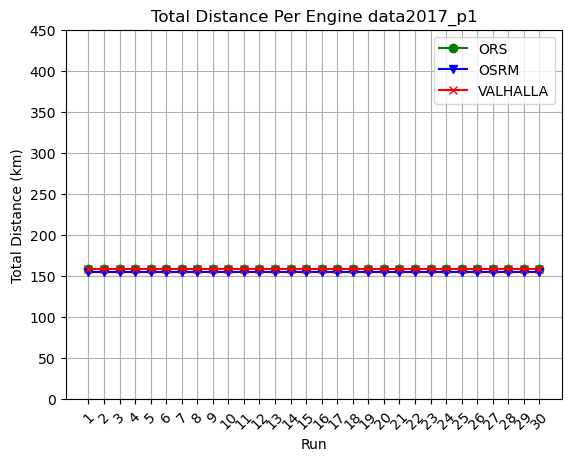

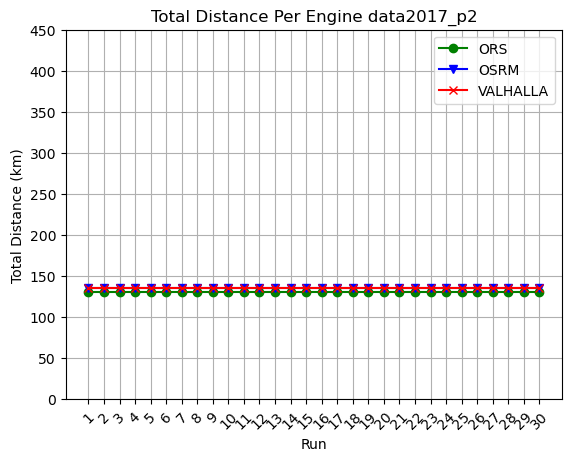

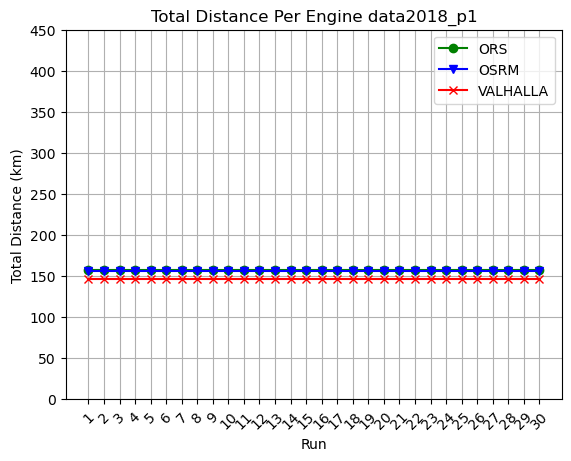

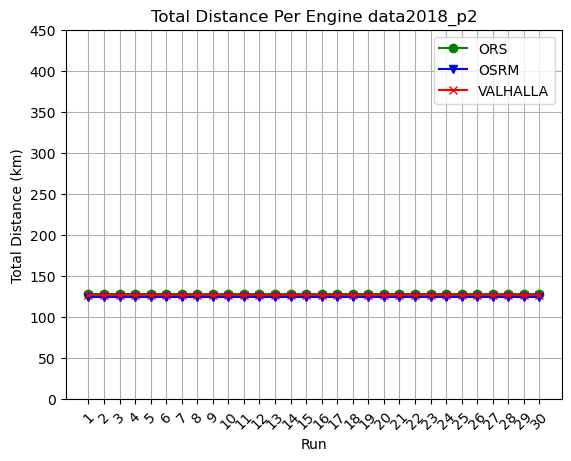

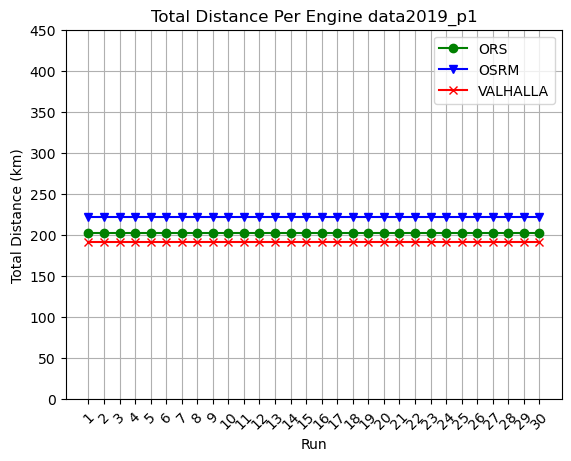

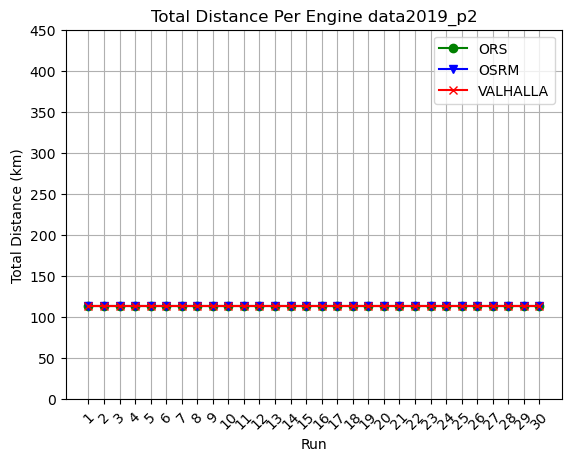

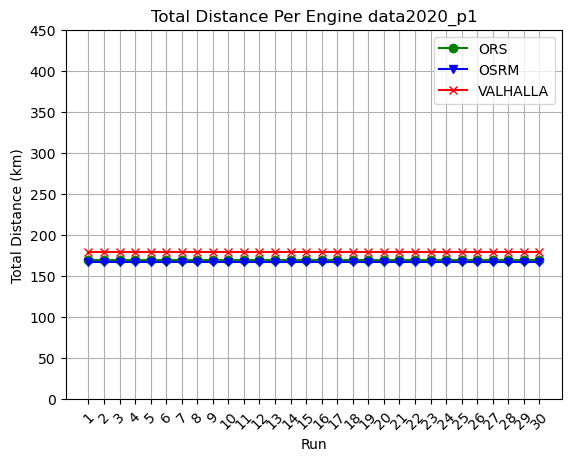

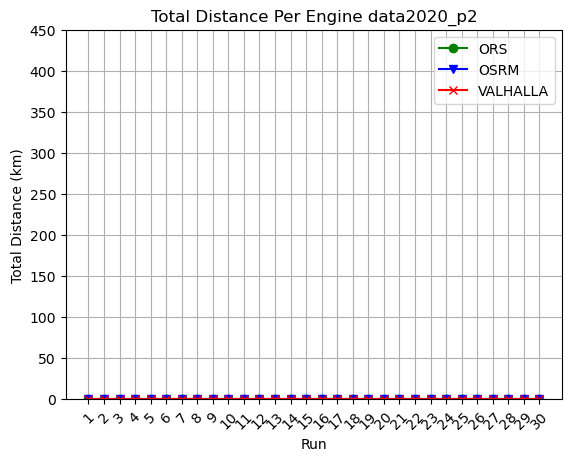

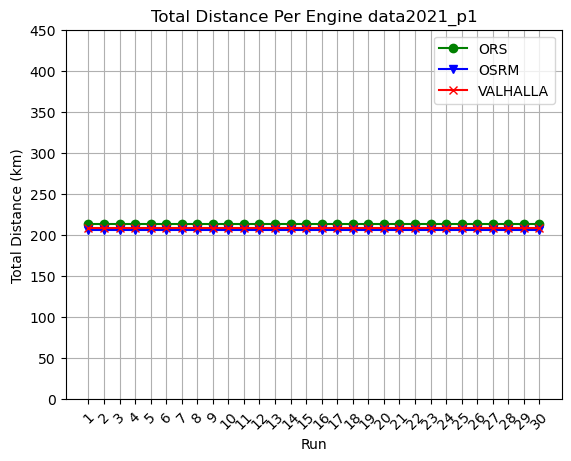

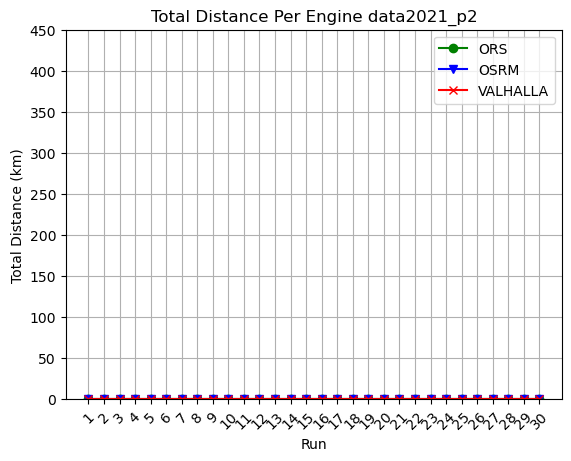

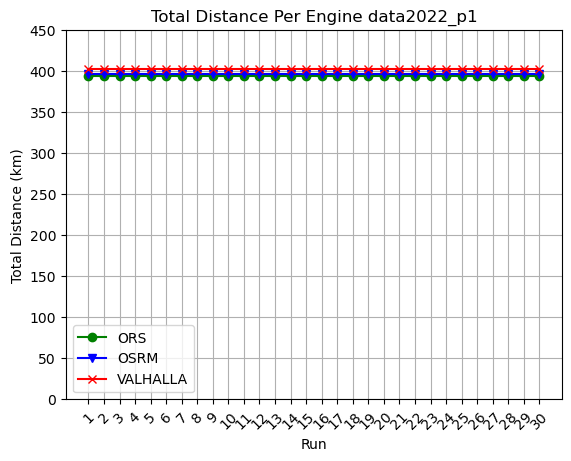

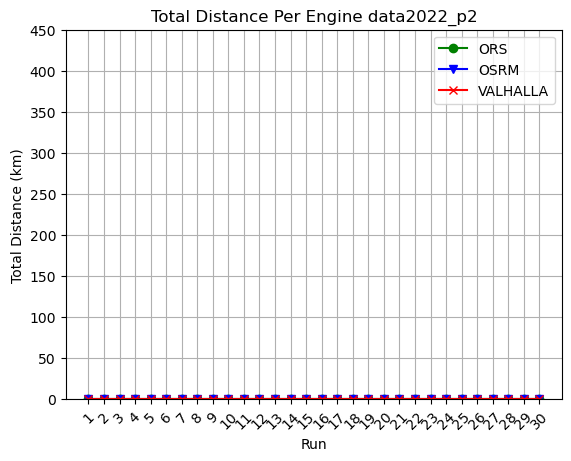

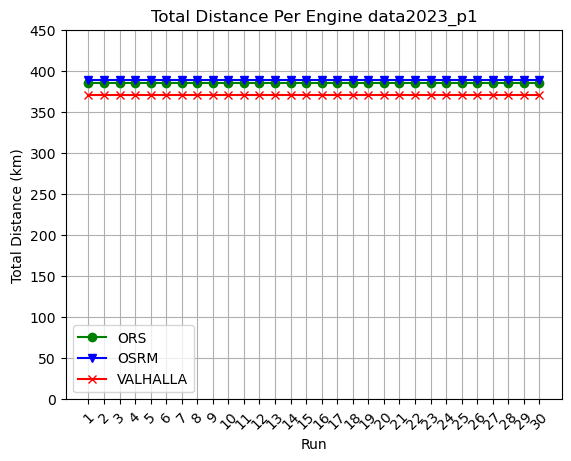

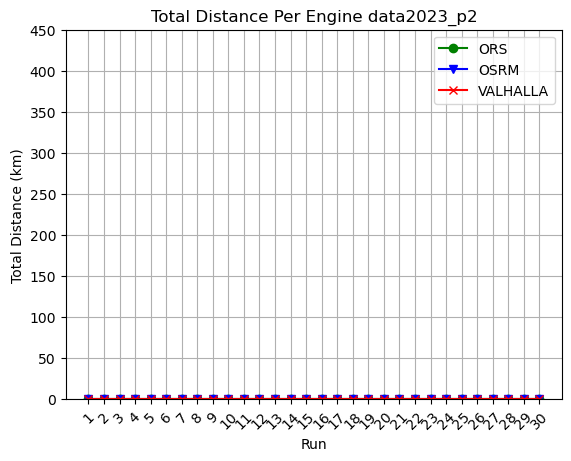

In [11]:
# Plot line serie of data

def make_graphs(graph_type):
    #Read your data from file
    #file = "Data/Resultat/rerun.txt"
    file = "Data/Resultat/MIX.txt"
    df = pd.read_csv(file, sep=",", header=0)
    names=['ORS','OSRM','VALHALLA']
    ORS_start = 0
    ORS_end = 30
    OSRM_start = 30
    OSRM_end = 60
    VALHALLA_start = 60
    VALHALLA_end = 90
    for item in range(1,23):    
        for name in names: 
            period = df['FILENAME'].iloc[ORS_start]
            splitting = period.split("/")
            period = splitting[-1]
            x = range(1,31) 
            if(name=='ORS'):
                y = df[graph_type].iloc[ORS_start:ORS_end].tolist() 
                if graph_type == "TIME_TAKEN":
                    for index, item in enumerate(y):
                        split = item.split(":")
                        item = float(split[-1])
                        #print(item)
                        y[index]=item
                plt.plot(x, y,color = 'green', label='ORS', marker='o')
                ORS_y = y
            elif(name=='OSRM'):
                y = df[graph_type].iloc[OSRM_start:OSRM_end].tolist()
                if graph_type == "TIME_TAKEN":
                    for index, item in enumerate(y):
                        split = item.split(":")
                        item = float(split[-1])
                        #print(item)
                        y[index]=item 
                plt.plot(x, y,color = 'blue', label='OSRM', marker='v')
                OSRM_y = y
            elif(name=='VALHALLA'): 
                y = df[graph_type].iloc[VALHALLA_start:VALHALLA_end].tolist() 
                if graph_type == "TIME_TAKEN":
                    for index, item in enumerate(y):
                        split = item.split(":")
                        item = float(split[-1])
                        #print(item)
                        y[index]=item
                plt.plot(x, y,color = 'red', label='VALHALLA', marker='x')
                VALHALLA_y = y
            else:
                plt.plot(x, y)
        
        dict = {
            'ORS':ORS_y,
            'OSRM':OSRM_y,
            'VALHALLA':VALHALLA_y
        }

       # print(dict)
        df2 = pd.DataFrame(dict)
        if graph_type == "TIME_TAKEN":
            df2.to_csv(f'Data/Graphs/duration_{period}.txt', sep=',',header=0, index=False, encoding='utf-8')
            y_label = "Total Runtime Duration (s)"
            title = f'Runtime Duration {period}'
            savefile = f'Data/Graphs/LineGraphs/runtime_duration_{period}.pdf'
        elif graph_type == "TOTAL_COST":
            df2.to_csv(f'Data/Graphs/distance_{period}.txt', sep=',',header=0, index=False, encoding='utf-8')
            y_label = "Total Distance (km)"
            title = f'Total Distance Per Engine {period}'
            savefile = f'Data/Graphs/LineGraphs/distance_{period}.pdf'
        ORS_start += 90
        ORS_end += 90
        OSRM_start += 90
        OSRM_end += 90
        VALHALLA_start += 90
        VALHALLA_end += 90
        if graph_type == "TIME_TAKEN":
            plt.ylim(bottom=0,top=4.3)
        if graph_type == "TOTAL_COST":
            plt.ylim(bottom=0,top=450)
        #print(period)
        plt.xlabel('Run')
        plt.ylabel(y_label)
        plt.title(title)
        plt.grid(True)
        plt.xticks(x,rotation=45)        
        plt.legend()
        plt.savefig(savefile)
        plt.show()
graph_type = "TIME_TAKEN" 
make_graphs(graph_type)
graph_type = "TOTAL_COST" 
make_graphs(graph_type)    

Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0
Route is 0


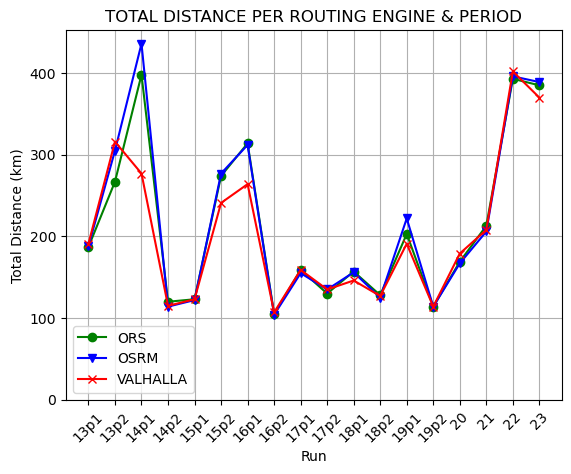

ÄÄÄÄÄÄ
{'ORS': [187, 267, 398, 120, 123, 274, 314, 105, 159, 130, 157, 128, 203, 114, 169, 213, 393, 385], 'OSRM': [188, 305, 436, 114, 122, 277, 312, 104, 155, 135, 156, 125, 222, 114, 167, 206, 396, 389], 'VALHALLA': [191, 316, 277, 115, 123, 241, 264, 107, 159, 135, 146, 127, 191, 114, 179, 208, 402, 370]}


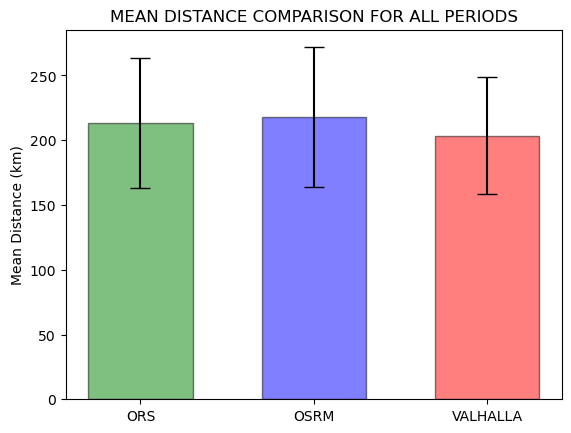

[0, 0, 121, 6, 1, 33, 50, 1, 4, 0, 11, 3, 12, 0, 2, 7, 0, 15]
[1, 38, 159, 0, 0, 36, 48, 0, 0, 5, 10, 0, 31, 0, 0, 0, 3, 19]
[4, 49, 0, 1, 1, 0, 0, 3, 4, 5, 0, 2, 0, 0, 12, 2, 9, 0]


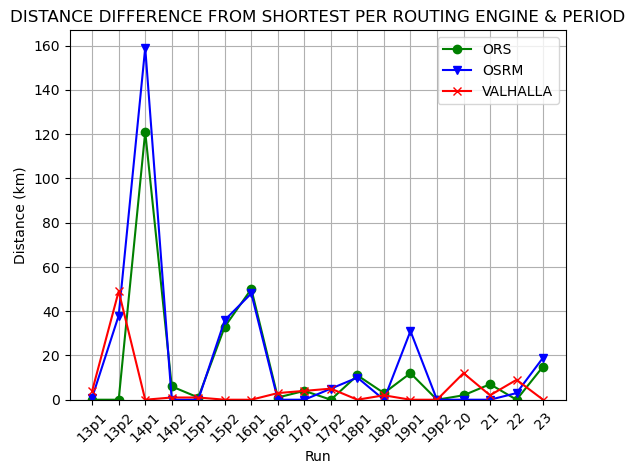

[266, 350, 92]


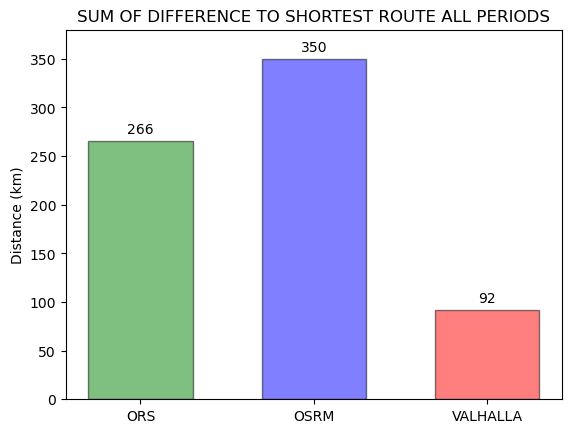

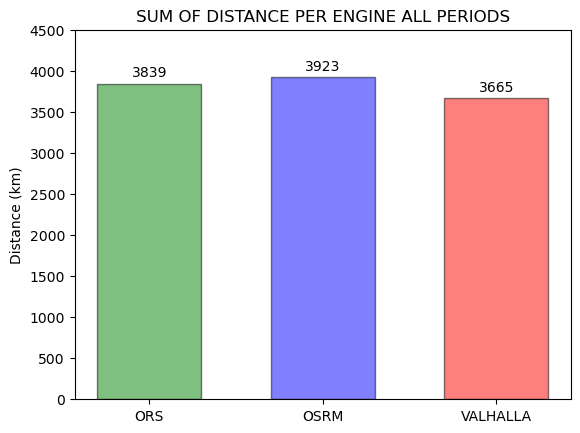

In [19]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return -h, +h

def make_graphs(filename,time_cost_method):
    #Read your data from file
    file = filename
    df = pd.read_csv(file, sep=",", header=0)
    # Plot line serie of data
    names=['ORS','OSRM','VALHALLA']
    ORS_start = 0
    ORS_end = 30
    OSRM_start = 30
    OSRM_end = 60
    VALHALLA_start = 60
    VALHALLA_end = 90
    ORS_y = []
    OSRM_y = []
    VALHALLA_y = []
    for a in range(1,23):    
        for name in names: 
            #x = range(1,19) 
#            if (df['TOTAL_COST'].iloc[ORS_start] != 0):
            if(name=='ORS'):
                for item in range(ORS_start,ORS_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            ORS_y.append(df['TOTAL_COST'].iloc[item])
                        else:
                            #print(df['ALL_DELIVERED'].iloc[item])
                            #print(df['TOTAL_COST'].iloc[item])
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        ORS_y.append(-1)
            elif(name=='OSRM'):
                for item in range(OSRM_start,OSRM_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            OSRM_y.append(df['TOTAL_COST'].iloc[item])
                        else:
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        OSRM_y.append(-1)
            elif(name=='VALHALLA'): 
                for item in range(VALHALLA_start,VALHALLA_start+1):
                    if df['ALL_DELIVERED'].iloc[item]=='YES':
                        if df['TOTAL_COST'].iloc[item] != 0:
                            VALHALLA_y.append(df['TOTAL_COST'].iloc[item]) 
                        else:
                            print("Route is 0")                
                    else:
                        print("UNDELIVERED SHIPMENTS")
                        VALHALLA_y.append(-1)
        ORS_start += 90
        ORS_end += 90
        OSRM_start += 90
        OSRM_end += 90
        VALHALLA_start += 90
        VALHALLA_end += 90
    x = ['13p1','13p2','14p1','14p2','15p1','15p2','16p1','16p2','17p1','17p2','18p1','18p2','19p1','19p2','20','21','22','23']
    #x = range(1,ORS_y.__len__()+1)
    plt.plot(x, ORS_y,color = 'green', label='ORS', marker='o')
    #x = range(1,OSRM_y.__len__()+1)
    plt.plot(x, OSRM_y,color = 'blue', label='OSRM', marker='v')
    #x = range(1,VALHALLA_y.__len__()+1)
    plt.plot(x, VALHALLA_y,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    plt.ylabel('Total Distance (km)')
    plt.title(f'TOTAL DISTANCE PER ROUTING ENGINE & PERIOD')
    plt.grid(True)
    plt.xticks(x)
    plt.ylim(bottom=0)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f"Data/Graphs/time-cost-{time_cost_method}.pdf",bbox_inches='tight')
    plt.show()
    #Call CI function
    CI_ors = mean_confidence_interval(ORS_y)
    CI_osrm =  mean_confidence_interval(OSRM_y)
    CI_valhalla =  mean_confidence_interval(VALHALLA_y)
    #print ("CIs ORS: ", CI_ors)
    #print ("CIs OSRM", CI_osrm)
    #print ("CIs VALHALLA:", CI_valhalla) 
    #print(ORS_y)
    #print(OSRM_y)
    #print(VALHALLA_y)
    dict = {
        'ORS':ORS_y,
        'OSRM':OSRM_y,
        'VALHALLA':VALHALLA_y
    }

    print("ÄÄÄÄÄÄ")
    print(dict)
    df2 = pd.DataFrame(dict)
    df2.to_csv(f'Data/Graphs/data.txt', sep=',',header=0, index=False, encoding='utf-8')
    #print(df2['ORS'])
    # width of the bars
    barWidth = 0.6
    # Bars Data
    barsData = df2.mean()
    # The x-position order of bars
    barsOrder = range(len(df2.columns))
    # Std Bars Interval
    #barsInterval = df2.std()
    # Bars for CI Intervals
    df_CI = pd.DataFrame(list(zip(CI_ors, CI_osrm,CI_valhalla)), columns = ['ORS', 'OSRM', 'VALHALLA'])
    barsInterval = df_CI.iloc[1]
    #print(barsInterval)
    # Colours of bar charts
    colors=["green","blue","red" ]

    # Opacity of colours
    Opacity=0.5

    # Plot bars
    plt.bar(barsOrder, barsData, color = colors , edgecolor = 'black', width = barWidth, yerr=barsInterval, capsize=7, alpha=Opacity)

    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)
    #plt.grid(True)
    plt.ylabel('Mean Distance (km)')
    plt.ylim(bottom=0)
    plt.title(f'MEAN DISTANCE COMPARISON FOR ALL PERIODS')
    plt.savefig(f"Data/Graphs/mean-time-cost-{time_cost_method}.pdf",bbox_inches='tight')
    plt.show()
    ors_diff = []
    osrm_diff = []
    valhalla_diff = []
    for i in range (0,ORS_y.__len__()):
        a = ORS_y[i]
        b = OSRM_y[i]
        c = VALHALLA_y[i]
        # Filter out -1 values
        values = [value for value in [a, b, c] if value != -1]
        if values:            
            min_value = min(values)
    
            diff_a = a - min_value if a != -1 else 0
            diff_b = b - min_value if b != -1 else 0
            diff_c = c - min_value if c != -1 else 0

            ors_diff.append(diff_a)
            osrm_diff.append(diff_b)
            valhalla_diff.append(diff_c)
        else:
            ors_diff.append(0)
            osrm_diff.append(0)
            valhalla_diff.append(0)
    #print(ors_diff)
    #print(osrm_diff)
    #print(valhalla_diff)
    #x = range(1,ors_diff.__len__()+1) 
    print(ors_diff)
    print(osrm_diff)
    print(valhalla_diff)
    plt.plot(x, ors_diff,color = 'green', label='ORS', marker='o')
    plt.plot(x, osrm_diff,color = 'blue', label='OSRM', marker='v')
    plt.plot(x, valhalla_diff,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    plt.ylabel('Distance (km)')
    plt.title(f'DISTANCE DIFFERENCE FROM SHORTEST PER ROUTING ENGINE & PERIOD')
    plt.grid(True)
    plt.xticks(x)
    plt.ylim(bottom=0)
    plt.legend()
    plt.xticks(rotation=45)
    plt.savefig(f"Data/Graphs/time-cost-diff-{time_cost_method}.pdf",bbox_inches='tight')
    plt.show()
    ors_sum_diff = sum(ors_diff)
    osrm_sum_diff = sum(osrm_diff)
    valhalla_sum_diff = sum(valhalla_diff)
    ors_sum = sum(ORS_y)
    osrm_sum = sum(OSRM_y)
    valhalla_sum = sum(VALHALLA_y)

    x = ['ORS','OSRM','VALHALLA']
    y = [ors_sum_diff,osrm_sum_diff,valhalla_sum_diff]
    print(y)
    rects = plt.bar(x,y,color = colors, edgecolor = 'black', width = barWidth,alpha=Opacity)
    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)
   # plt.grid(True)
    plt.bar_label(rects, padding=3)
    plt.ylabel('Distance (km)')
    plt.ylim(bottom=0, top=380)
    #plt.xlabel('Browsers')
    plt.title('SUM OF DIFFERENCE TO SHORTEST ROUTE ALL PERIODS')
    plt.savefig(f"Data/Graphs/Sum-time-cost-diff-{time_cost_method}.pdf",bbox_inches='tight')
    plt.show()

    y = [ors_sum,osrm_sum,valhalla_sum]
    rects = plt.bar(x,y,color = colors, edgecolor = 'black', width = barWidth,alpha=Opacity)
    plt.xticks(range(len(df2.columns)), df2.columns)
    #plt.grid(True)
    plt.ylabel('Distance (km)')
    offset = barWidth * 1
    #rects = plt.bar(x, y, barWidth, label=x)
    plt.bar_label(rects, padding=3)
    plt.ylim(bottom=0, top = 4500)
    plt.title('SUM OF DISTANCE PER ENGINE ALL PERIODS')
    plt.savefig(f"Data/Graphs/Sum-distance-engine-{time_cost_method}.pdf",bbox_inches='tight')
    plt.show()
#make_graphs("Data/Resultat/MAX.txt","max")
make_graphs("Data/Resultat/MIX.txt","mix")
#make_graphs("Data/Resultat/rerun.txt","rerun")
#make_graphs("Data/Resultat/MIN.txt","min")

No values
No values
No values
No values


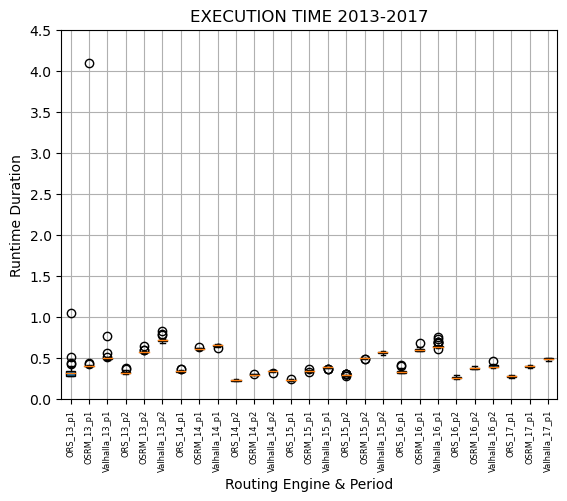

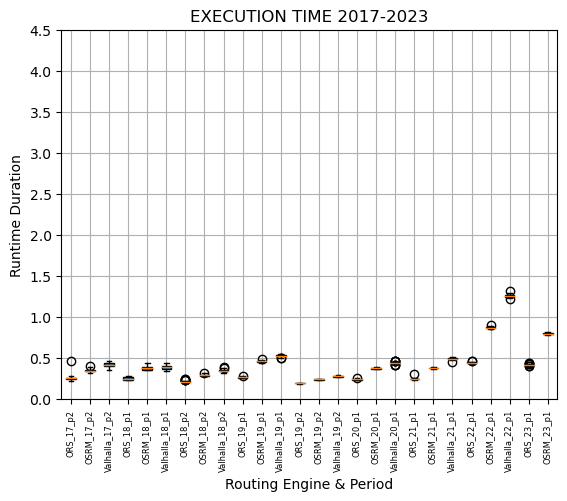

In [27]:
##Boxplots of durations
data = []
periods = 2
max_years = 23
x_names = []
for x in range(13,max_years+1):
        year = x
        for a in range(1,periods+1):
            filename = f"data20{year}_p{a}"   
            file = f"Data/Graphs/duration_{filename}.txt"
            df = pd.read_csv(file, sep=",", header=None, names=['ORS','OSRM','Valhalla'])
            if year >= 20 and a == 2:
                  print("No values")
            else:
                data.append(df["ORS"])
                x_names.append(f"ORS_{year}_p{a}")
                data.append(df["OSRM"])
                x_names.append(f"OSRM_{year}_p{a}")
                data.append(df["Valhalla"])
                x_names.append(f"Valhalla_{year}_p{a}")

# Creating plot
columns = ['ORS','OSRM','Valhalla']
first_half = data[0:int((data.__len__()/2))]
second_half = data[int((data.__len__()/2)):-1]
plt.boxplot(first_half,patch_artist=True, labels=x_names[0:int((data.__len__()/2))])
plt.xlabel('Routing Engine & Period')
plt.ylabel("Runtime Duration")
plt.title(f"EXECUTION TIME 2013-2017")
plt.grid(True)
plt.ylim(0,4.5)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=6)



#plt.tight_layout()
#plt.figure().set_figwidth(1500)
#plt.xticks(x)
#plt.legend()
plt.savefig(f"Data/Graphs/Duration/Boxplots_duration_2013-2017.pdf",bbox_inches='tight')
plt.show()

second_half = data[int((data.__len__()/2)):-1]
plt.boxplot(second_half,patch_artist=True, labels=x_names[int((data.__len__()/2)):-1])
plt.xlabel('Routing Engine & Period')
plt.ylabel("Runtime Duration")
plt.title(f"EXECUTION TIME 2017-2023")
plt.grid(True)
plt.ylim(0,4.5)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=6)

plt.savefig(f"Data/Graphs/Duration/Boxplots_duration_2017-2023.pdf",bbox_inches='tight')
plt.show()

No values
No values
No values
No values
ORS
[0.3539569999999999, 0.33101223333333335, 0.34205186666666665, 0.2310285, 0.2340323, 0.2954496333333333, 0.3388701333333334, 0.2667155, 0.28170886666666667, 0.2617272, 0.2543065, 0.2193958666666667, 0.2680647, 0.1975503, 0.24545916666666662, 0.2486264333333333, 0.4463889333333332, 0.4179367333333333]
OSRM
[0.52979, 0.5808134333333334, 0.6175473, 0.3012245333333333, 0.34590079999999995, 0.5002791666666665, 0.6056763333333333, 0.3811664999999999, 0.40341636666666675, 0.3503366666666667, 0.3817092, 0.29410069999999994, 0.4621434666666666, 0.24315459999999997, 0.37950586666666675, 0.38129163333333327, 0.8734033000000001, 0.8004205333333333]
Valhalla
[0.5097672, 0.7233113333333332, 0.6571244999999999, 0.3434901000000001, 0.38875423333333337, 0.5702686, 0.6525607, 0.40449680000000005, 0.49349090000000007, 0.41947363333333326, 0.3912404, 0.35269356666666657, 0.5312994, 0.28178576666666666, 0.44266906666666667, 0.4940027000000001, 1.2597936000000003,

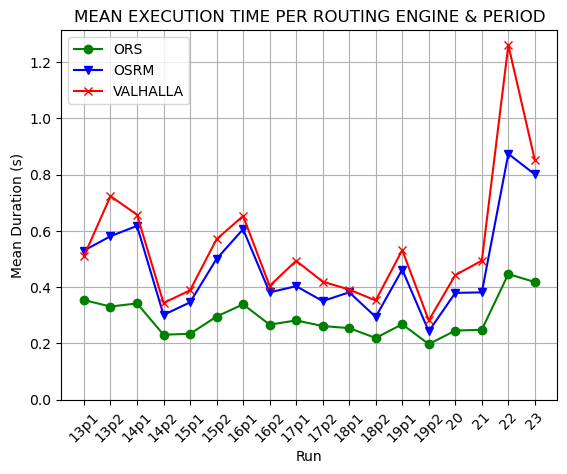

ORS
[0.05340662318377, 0.006583806252140182, 0.004188683566483802, 0.0019735809378205165, 0.001760572452205922, 0.0022063419637064347, 0.009625715865896495, 0.004554557251634107, 0.0036618026190571988, 0.015235394357500752, 0.00582958562321116, 0.004516771041788549, 0.0025248640515399346, 0.0011629460998948012, 0.0020644925654176526, 0.004623807368979767, 0.0034014882241669, 0.0028551349103324536]
OSRM
[0.2513271130509574, 0.005682830209798303, 0.002105017330786578, 0.0012487966259286214, 0.0026178406442015005, 0.0016573258785105116, 0.007649243161515987, 0.004266237719656639, 0.0032216549300997364, 0.006973787465919984, 0.007876548520956973, 0.004543940214569078, 0.003684931929551068, 0.001228025766004122, 0.0023811518032462523, 0.0018136586423852003, 0.003968884692096345, 0.00286104238869762]
Valhalla
[0.019084549372684015, 0.011169321195058259, 0.004398450989222435, 0.0026163331117833055, 0.0029195327248885392, 0.004971905001936662, 0.012434335052604373, 0.006731946262789013, 0.0039

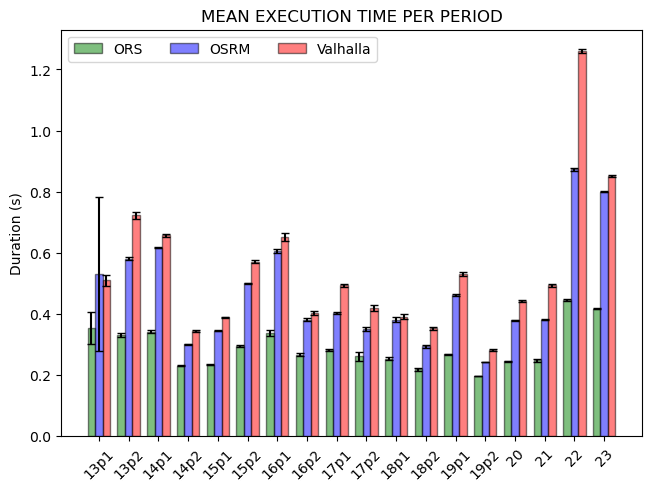

ORS         0.033839
OSRM        0.085766
VALHALLA    0.114963
Name: 1, dtype: float64


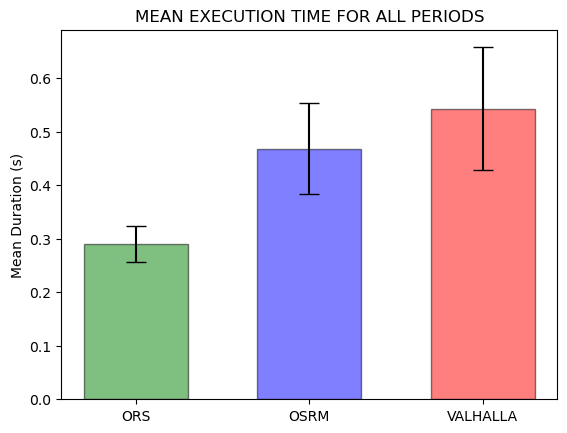

No values
No values
No values
No values
ORS
[187.0, 267.0, 398.0, 120.0, 123.0, 274.0, 314.0, 105.0, 159.0, 130.0, 157.0, 128.0, 203.0, 114.0, 169.0, 213.0, 393.0, 385.0]
OSRM
[188.0, 305.0, 436.0, 114.0, 122.0, 277.0, 312.0, 104.0, 155.0, 135.0, 156.0, 125.0, 222.0, 114.0, 167.0, 206.0, 396.0, 389.0]
Valhalla
[191.0, 316.0, 277.0, 115.0, 123.0, 241.0, 264.0, 107.0, 159.0, 135.0, 146.0, 127.0, 191.0, 114.0, 179.0, 208.0, 402.0, 370.0]


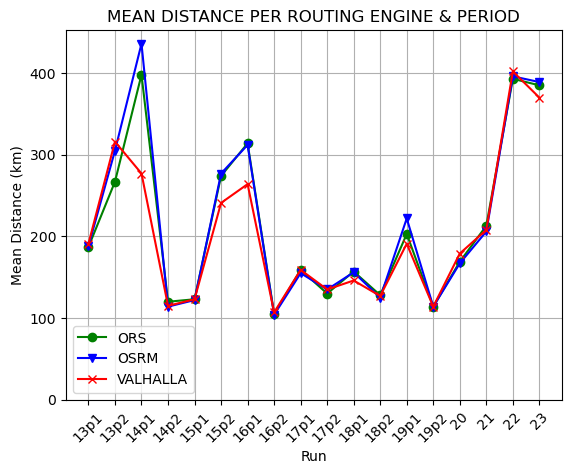

ORS
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
OSRM
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Valhalla
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


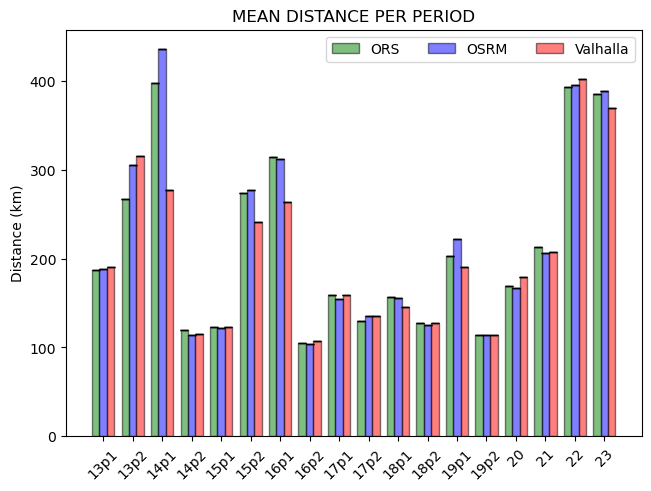

ORS         50.330364
OSRM        53.829281
VALHALLA    44.909790
Name: 1, dtype: float64


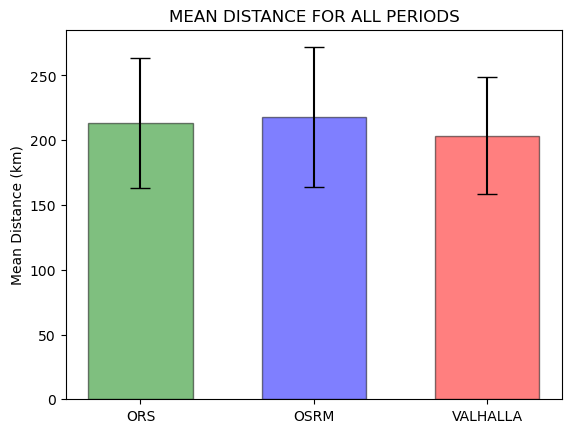

In [26]:

def make_graphs(input):
    type_ = input
    #Duration means
    data_ORS = []
    data_OSRM = []
    data_Valhalla = []
    data_ORS_mean = []
    data_OSRM_mean = []
    data_Valhalla_mean = []
    periods = 2
    max_years = 23
    x_names = []
    for x in range(13,max_years+1):
            year = x
            for a in range(1,periods+1):
                filename = f"data20{year}_p{a}"   
                file = f"Data/Graphs/{type_}_{filename}.txt"
                df = pd.read_csv(file, sep=",", header=None, names=['ORS','OSRM','Valhalla'])
                if year >= 20 and a == 2:
                    print("No values")
                else:
                    data_ORS.append(df["ORS"])

                    data_OSRM.append(df["OSRM"])

                    data_Valhalla.append(df["Valhalla"])
                    

    x = ['13p1','13p2','14p1','14p2','15p1','15p2','16p1','16p2','17p1','17p2','18p1','18p2','19p1','19p2','20','21','22','23']
    #x = range(1,ORS_y.__len__()+1)
    #df2 = pd.DataFrame(data_ORS)
    for item in data_ORS:
        data_ORS_mean.append(item.mean())
    for item in data_OSRM:
        data_OSRM_mean.append(item.mean())
    for item in data_Valhalla:
        data_Valhalla_mean.append(item.mean())
    print("ORS")
    print(data_ORS_mean)
    print("OSRM")
    print(data_OSRM_mean)
    print("Valhalla")
    print(data_Valhalla_mean)
    #df2.to_csv(f'Data/Graphs/data.txt', sep=',',header=0, index=False, encoding='utf-8')
    #print(df2)
    # Bars Data
    #ors_mean = df2["ORS"]
    #print(ors_mean)
    plt.plot(x, data_ORS_mean,color = 'green', label='ORS', marker='o')
    #x = range(1,OSRM_y.__len__()+1)
    plt.plot(x, data_OSRM_mean,color = 'blue', label='OSRM', marker='v')
    #x = range(1,VALHALLA_y.__len__()+1)
    plt.plot(x, data_Valhalla_mean,color = 'red', label='VALHALLA', marker='x')
    plt.xlabel('Run')
    if type_ == "distance":
        format_ = "(km)"
        title = "MEAN DISTANCE PER ROUTING ENGINE & PERIOD"
    if type_ == "duration":
        format_ = "(s)"
        title = "MEAN EXECUTION TIME PER ROUTING ENGINE & PERIOD"
    plt.title(f'{title}')
    #plt.title(f'MEAN {type_.upper()} PER ROUTING ENGINE & PERIOD')
    plt.ylabel(f'Mean {type_.capitalize()} {format_}')
    plt.grid(True)
    plt.xticks(x)
    plt.ylim(bottom=0)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f"Data/Graphs/Duration/mean_{type_}_2013-2023.pdf",bbox_inches='tight')
    plt.show()



    ###Bar graph mean
    def mean_confidence_interval(data, confidence=0.95):
        a = 1.0 * np.array(data)
        n = len(a)
        m, se = np.mean(a), stats.sem(a)
        h = se * stats.t.ppf((1 + confidence) / 2., n-1)
        return -h, +h

    CI_ors = []
    CI_osrm = []
    CI_valhalla = []
    for item in data_ORS:
        a,b = mean_confidence_interval(item)
        #CI_ors.append(a)
        CI_ors.append(b)
    for item in data_OSRM:
        a,b = mean_confidence_interval(item)
        #CI_osrm.append(a)
        CI_osrm.append(b)
        #CI_osrm.append(a,b = mean_confidence_interval(item))
    for item in data_Valhalla:
        a,b = mean_confidence_interval(item)
        #CI_valhalla.append(a)
        CI_valhalla.append(b)
        #CI_valhalla.append(a,b = mean_confidence_interval(item))

    df_CI2 = pd.DataFrame(list(zip(CI_ors, CI_osrm,CI_valhalla)), columns = ['ORS', 'OSRM', 'VALHALLA'])


    # Opacity of colours
    Opacity=0.5


    columns = x
    engine_means = {
        'ORS': data_ORS_mean,
        'OSRM': data_OSRM_mean,
        'Valhalla':data_Valhalla_mean
    }
    engine_CI = {
        'ORS': CI_ors,
        'OSRM': CI_osrm,
        'Valhalla':CI_valhalla
    }
    x = np.arange(len(columns))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    color = ['green','blue','red']
    for attribute, measurement in engine_means.items():
        print(attribute)
        offset = width * multiplier
        if multiplier % 3 == 0:
            barsInterval = engine_CI['ORS']
        elif multiplier % 3 ==1:
            barsInterval = engine_CI['OSRM']
        elif multiplier %3 ==2:
            barsInterval = engine_CI['Valhalla']
        print(barsInterval)
        rects = ax.bar(x + offset, measurement, width, label=attribute, color = color[multiplier%3],edgecolor = 'black',alpha=Opacity,yerr=barsInterval, capsize=3) #, 
        
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if type_ == "distance":
        format_ = "(km)"
        title = "MEAN DISTANCE PER PERIOD"
    if type_ == "duration":
        format_ = "(s)"
        title = "MEAN EXECUTION TIME PER PERIOD"
    ax.set_title(f'{title}')
    ax.set_ylabel(f'{type_.capitalize()} {format_}')
    ax.set_xticks(x + width, columns, rotation=45)
    if type_ == "distance":
        ax.legend(loc='upper right', ncols=3)
    if type_ == "duration":
        ax.legend(loc='upper left', ncols=3)
    #ax.legend(loc='upper left', ncols=3)
    #ax.set_ylim(0, 250)
    plt.savefig(f"Data/Graphs/Duration/mean_{type_}_per_period.pdf",bbox_inches='tight')
    plt.show()




    CI_ors = mean_confidence_interval(data_ORS_mean)
    CI_osrm = mean_confidence_interval(data_OSRM_mean)
    CI_valhalla = mean_confidence_interval(data_Valhalla_mean)
    dict = {
        'ORS':data_ORS_mean,
        'OSRM':data_OSRM_mean,
        'VALHALLA':data_Valhalla_mean
    }
    columns = ['ORS', 'OSRM', 'VALHALLA']
    df2 = pd.DataFrame(dict)
    #df2.to_csv(f'Data/Graphs/data2.txt', sep=',',header=0, index=False, encoding='utf-8')

    # width of the bars
    barWidth = 0.6
    # Bars Data
    barsData = df2.mean()
    # The x-position order of bars
    barsOrder = range(len(df2.columns))
    # Std Bars Interval
    #barsInterval = df2.std()
    # Bars for CI Intervals
    df_CI = pd.DataFrame(list(zip(CI_ors, CI_osrm,CI_valhalla)), columns = ['ORS', 'OSRM', 'VALHALLA'])
    barsInterval = df_CI.iloc[1]
    print(barsInterval)
    # Colours of bar charts
    colors=["green","blue","red" ]



    # Plot bars
    plt.bar(barsOrder, barsData, color = colors , edgecolor = 'black', width = barWidth, yerr=barsInterval, capsize=7, alpha=Opacity)

    #Put a tick on the x-axis undex each bar and label it with column name
    plt.xticks(range(len(df2.columns)), df2.columns)
    if type_ == "distance":
        format_ = "(km)"
        title = "MEAN DISTANCE FOR ALL PERIODS"
    if type_ == "duration":
        format_ = "(s)"
        title = "MEAN EXECUTION TIME FOR ALL PERIODS"
    plt.title(f'{title}')
    #plt.title(f'MEAN {type_.upper()} FOR ALL PERIODS')
    plt.ylabel(f'Mean {type_.capitalize()} {format_}')
    plt.ylim(bottom=0)
    plt.savefig(f"Data/Graphs/Duration/mean_{type_}_all.pdf",bbox_inches='tight')
    plt.show()
make_graphs("duration")
make_graphs("distance")

In [15]:
import scipy.stats as stats
import numpy as np
import statsmodels.stats.multicomp as multi
import pandas as pd

def anova(*data): # * indicates, 0, 1 , 2 .. arguments
    if len(data) == 2:
        statistic, pvalue = stats.f_oneway(data[0], data[1])
    elif len(data) == 3:
        statistic, pvalue = stats.f_oneway(data[0], data[1], data[2])
    elif len(data) == 4:
        statistic, pvalue = stats.f_oneway(data[0], data[1], data[2], data[3])
    print("ANOVA Statistic " + str(statistic) + " and p-value " + str(pvalue))
    if pvalue < 1 - 0.95 :
        return True,statistic,pvalue
    else:
        return False,statistic,pvalue
def exampleAnova():
    #Determine the group labels
    columns = ['ORS','OSRM','Valhalla']
    dict = {
            'PERIOD':[],
            'F-Statistics':[],
            'P-Value':[],
            'DIFF':[]
        }
    #Read your data from file
    periods = 2
    max_years = 23
    for x in range(13,max_years+1):
        year = x
        for a in range(1,periods+1):
            filename = f"data20{year}_p{a}"            
            file = f"Data/Graphs/duration_{filename}.txt"
            df = pd.read_csv(file, sep=",", header=None, names=['ORS','OSRM','Valhalla'])
            #Run Anova on data groups
            print(filename)
            if year >19 and a == 2:
                print("No data for this period")
            else:
                test,stat,p = anova (df['ORS'], df['OSRM'], df['Valhalla'])
                dict['PERIOD'].append(filename)
                dict['F-Statistics'].append(stat)
                dict['P-Value'].append(p)
                dict['DIFF'].append(test)
                if (test):
                    print ("The means are different")                    
                else:
                    print ("No differences in means")
    
    df2 = pd.DataFrame(dict)
    print(df2)
    df2.to_latex(f'Data/Graphs/Duration/Duration_anova2.txt', encoding='utf-8',index=False,float_format="{:.6f}".format,)
    df2.to_csv(f'Data/Graphs/Duration/Duration_anova.txt', sep=',', encoding='utf-8',index=False)
exampleAnova()

data2013_p1
ANOVA Statistic 1.7516230068564498 and p-value 0.17955466897538674
No differences in means
data2013_p2
ANOVA Statistic 2469.399761559375 and p-value 2.3262853973140246e-77
The means are different
data2014_p1
ANOVA Statistic 8945.185778911273 and p-value 1.9431128595580936e-101
The means are different
data2014_p2
ANOVA Statistic 3292.2859409120033 and p-value 1.035528628986269e-82
The means are different
data2015_p1
ANOVA Statistic 4334.321080219609 and p-value 7.57808239230137e-88
The means are different
data2015_p2
ANOVA Statistic 7915.806504015596 and p-value 3.856649813845236e-99
The means are different
data2016_p1
ANOVA Statistic 1174.9903934836657 and p-value 1.0990587567686567e-63
The means are different
data2016_p2
ANOVA Statistic 809.82307622881 and p-value 5.899916273097099e-57
The means are different
data2017_p1
ANOVA Statistic 3564.140640130255 and p-value 3.428233589251346e-84
The means are different
data2017_p2
ANOVA Statistic 204.2233965088295 and p-value 1.36

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1758      &     0.2074     &    -0.0694     &     0.4211     &      False       \\
      ORS       &     Valhalla    &       0.1558      &     0.289      &    -0.0895     &     0.4011     &      False       \\
      OSRM      &     Valhalla    &       -0.02       &     0.9793     &    -0.2653     &     0.2252     &      False       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


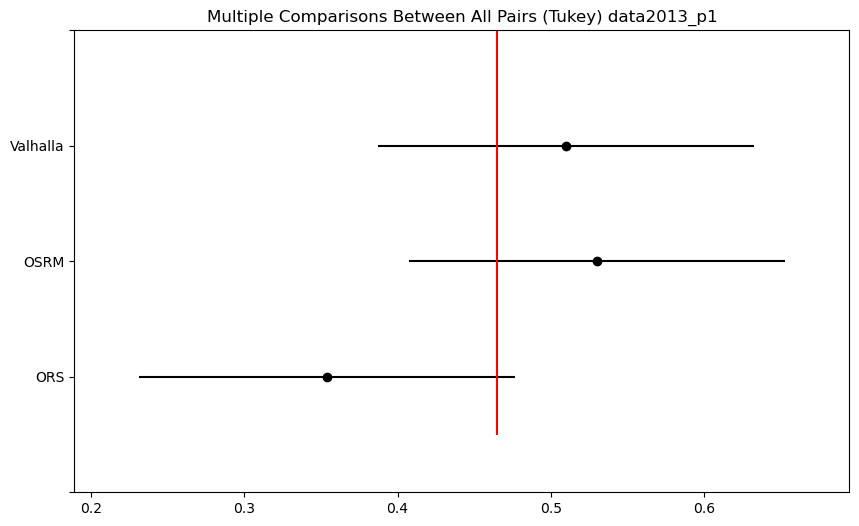

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.2498      &      0.0       &     0.2363     &     0.2633     &       True       \\
      ORS       &     Valhalla    &       0.3923      &      0.0       &     0.3788     &     0.4058     &       True       \\
      OSRM      &     Valhalla    &       0.1425      &      0.0       &     0.129      &     0.156      &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


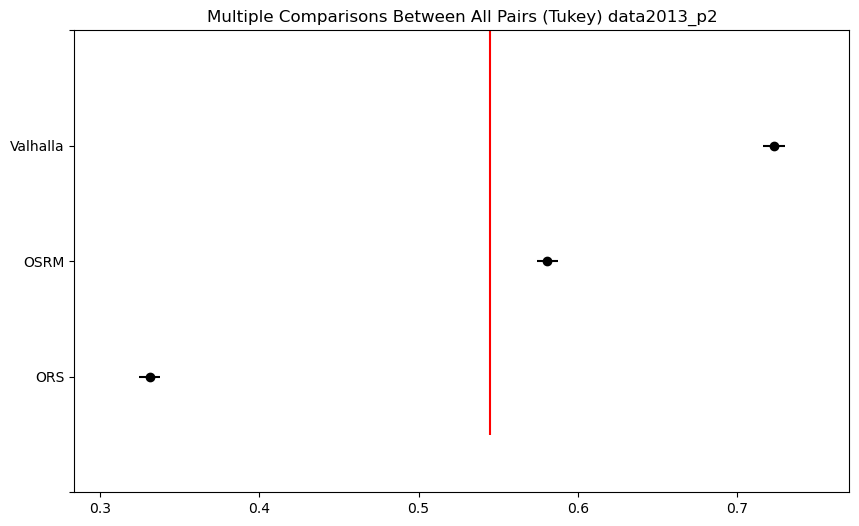

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.2755      &      0.0       &     0.2694     &     0.2816     &       True       \\
      ORS       &     Valhalla    &       0.3151      &      0.0       &     0.309      &     0.3212     &       True       \\
      OSRM      &     Valhalla    &       0.0396      &      0.0       &     0.0335     &     0.0457     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


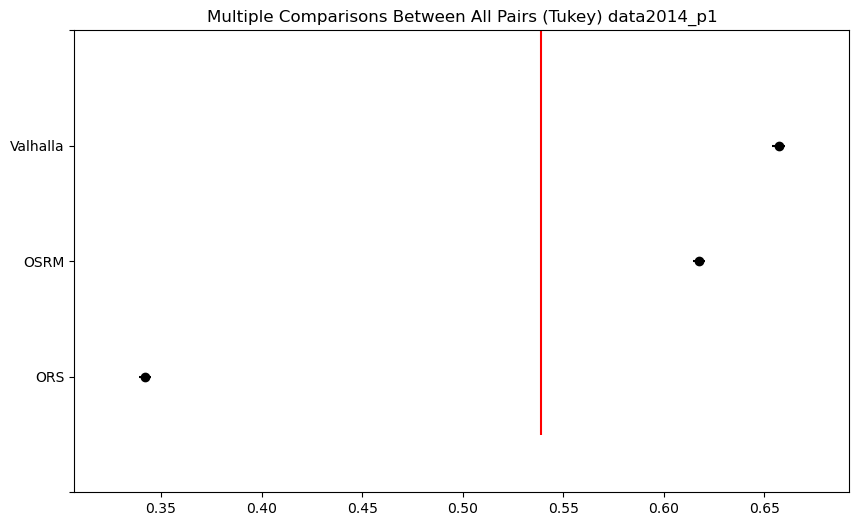

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.0702      &      0.0       &     0.0669     &     0.0735     &       True       \\
      ORS       &     Valhalla    &       0.1125      &      0.0       &     0.1091     &     0.1158     &       True       \\
      OSRM      &     Valhalla    &       0.0423      &      0.0       &     0.0389     &     0.0456     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


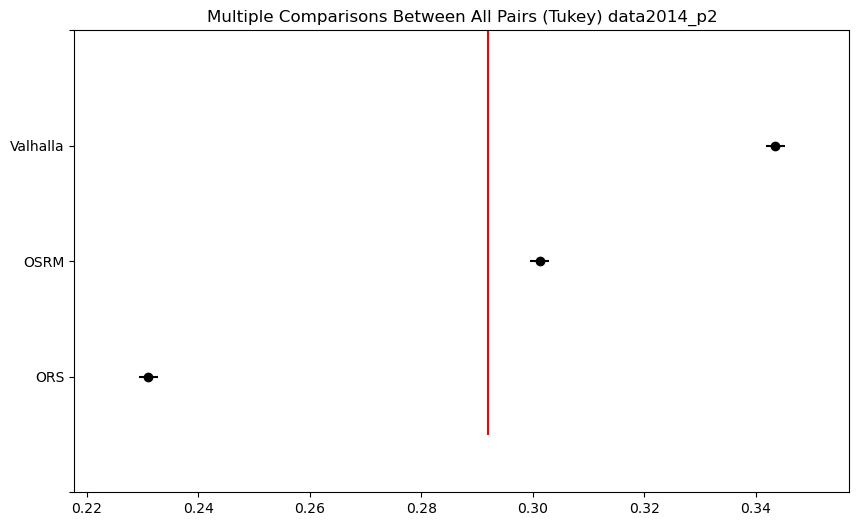

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1119      &      0.0       &     0.1078     &     0.116      &       True       \\
      ORS       &     Valhalla    &       0.1547      &      0.0       &     0.1506     &     0.1588     &       True       \\
      OSRM      &     Valhalla    &       0.0429      &      0.0       &     0.0388     &     0.0469     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


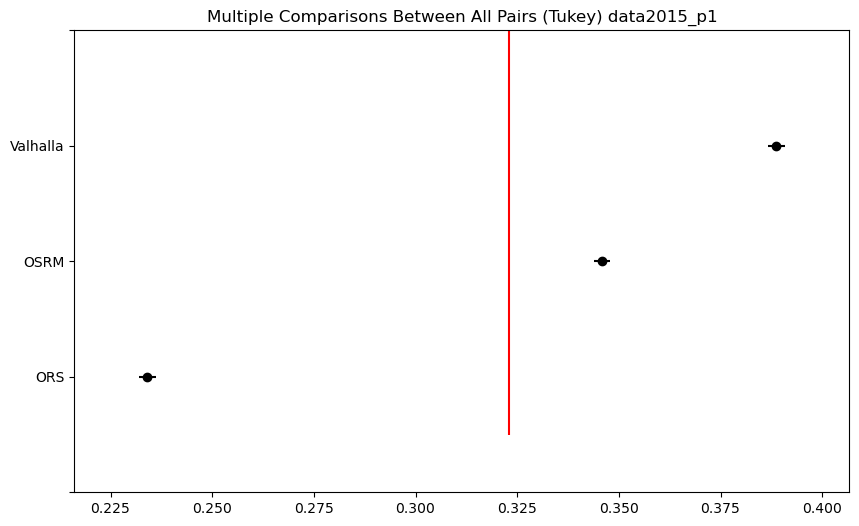

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.2048      &      0.0       &     0.1994     &     0.2102     &       True       \\
      ORS       &     Valhalla    &       0.2748      &      0.0       &     0.2694     &     0.2802     &       True       \\
      OSRM      &     Valhalla    &        0.07       &      0.0       &     0.0646     &     0.0754     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


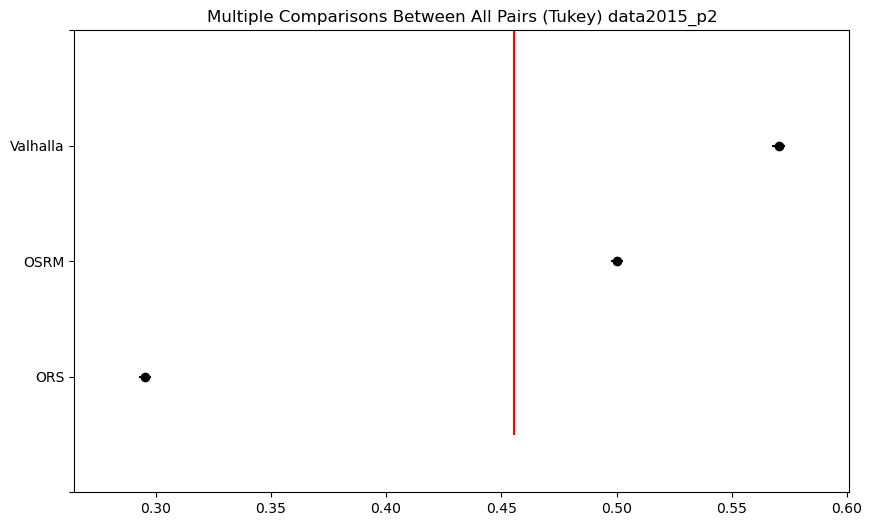

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.2668      &      0.0       &     0.2502     &     0.2835     &       True       \\
      ORS       &     Valhalla    &       0.3137      &      0.0       &     0.297      &     0.3303     &       True       \\
      OSRM      &     Valhalla    &       0.0469      &      0.0       &     0.0302     &     0.0635     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


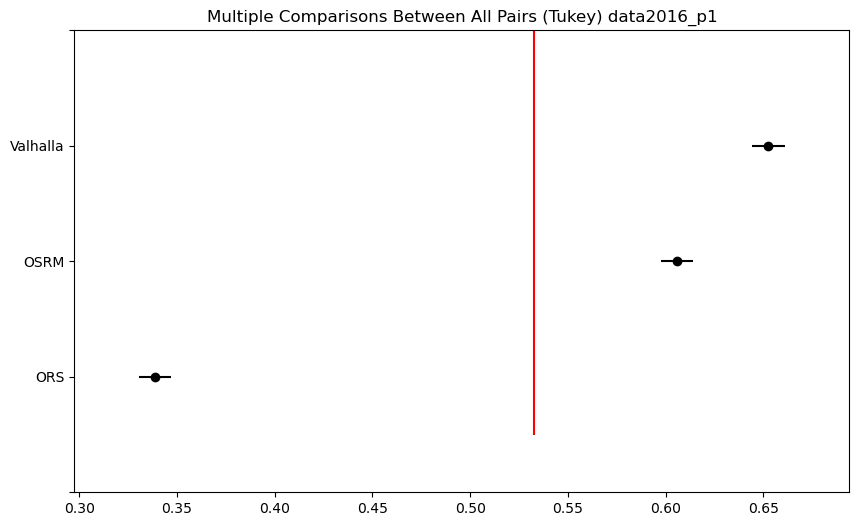

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1145      &      0.0       &     0.1057     &     0.1232     &       True       \\
      ORS       &     Valhalla    &       0.1378      &      0.0       &     0.129      &     0.1465     &       True       \\
      OSRM      &     Valhalla    &       0.0233      &      0.0       &     0.0146     &     0.0321     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


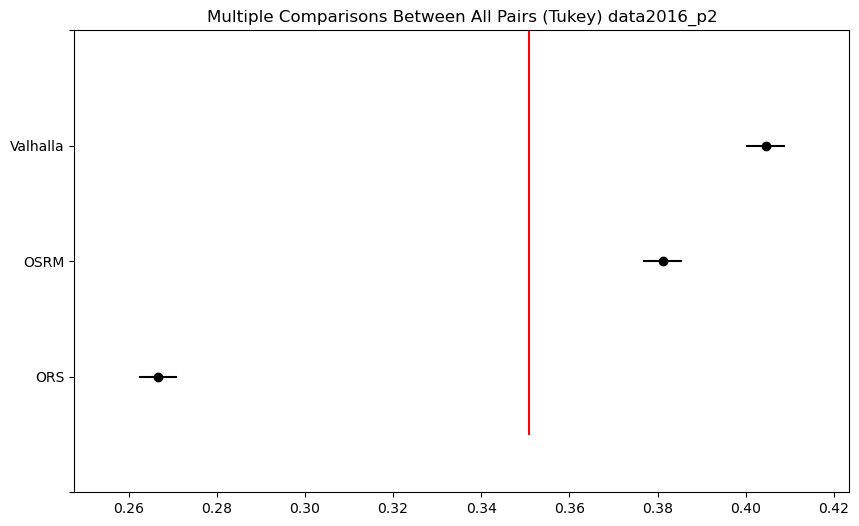

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1217      &      0.0       &     0.1157     &     0.1277     &       True       \\
      ORS       &     Valhalla    &       0.2118      &      0.0       &     0.2058     &     0.2178     &       True       \\
      OSRM      &     Valhalla    &       0.0901      &      0.0       &     0.0841     &     0.0961     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


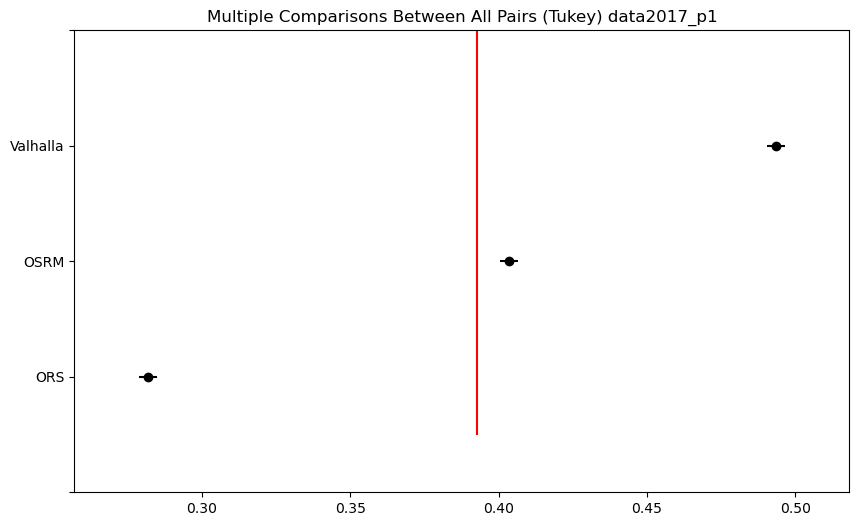

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.0886      &      0.0       &      0.07      &     0.1073     &       True       \\
      ORS       &     Valhalla    &       0.1577      &      0.0       &     0.1391     &     0.1764     &       True       \\
      OSRM      &     Valhalla    &       0.0691      &      0.0       &     0.0505     &     0.0878     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


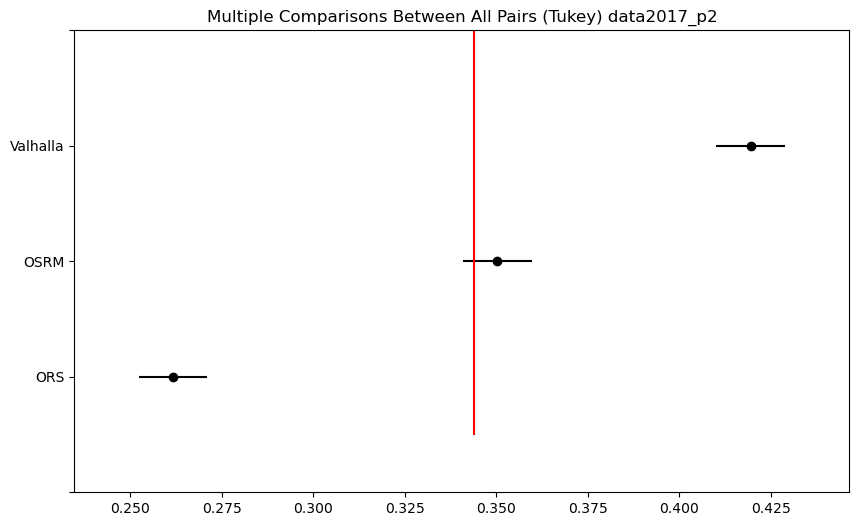

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1274      &      0.0       &     0.1148     &      0.14      &       True       \\
      ORS       &     Valhalla    &       0.1369      &      0.0       &     0.1243     &     0.1495     &       True       \\
      OSRM      &     Valhalla    &       0.0095      &     0.1745     &    -0.0031     &     0.0221     &      False       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


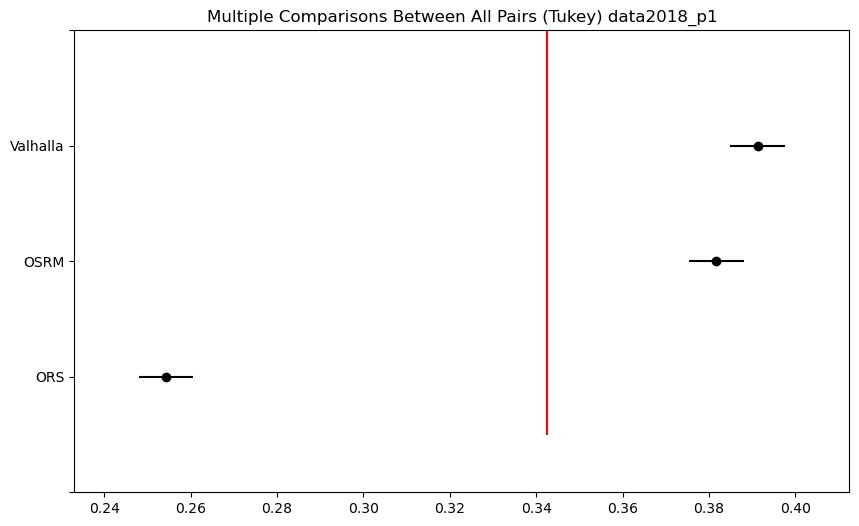

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.0747      &      0.0       &     0.0663     &     0.0831     &       True       \\
      ORS       &     Valhalla    &       0.1333      &      0.0       &     0.1249     &     0.1417     &       True       \\
      OSRM      &     Valhalla    &       0.0586      &      0.0       &     0.0502     &     0.067      &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


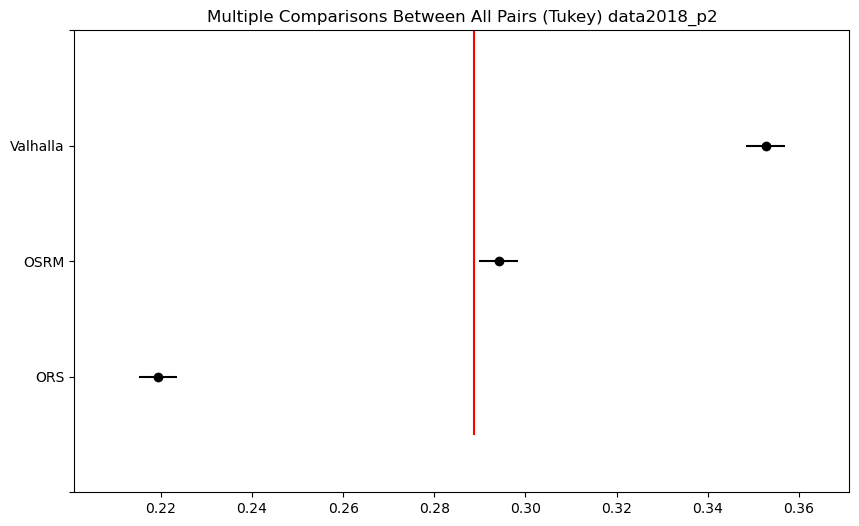

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1941      &      0.0       &     0.1874     &     0.2007     &       True       \\
      ORS       &     Valhalla    &       0.2632      &      0.0       &     0.2566     &     0.2699     &       True       \\
      OSRM      &     Valhalla    &       0.0692      &      0.0       &     0.0625     &     0.0758     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


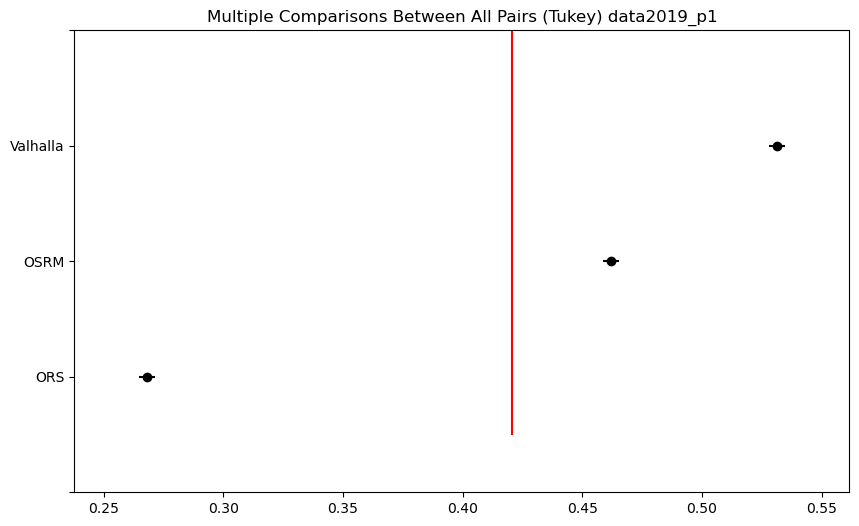

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.0456      &      0.0       &     0.0423     &     0.0489     &       True       \\
      ORS       &     Valhalla    &       0.0842      &      0.0       &     0.0809     &     0.0876     &       True       \\
      OSRM      &     Valhalla    &       0.0386      &      0.0       &     0.0353     &     0.0419     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


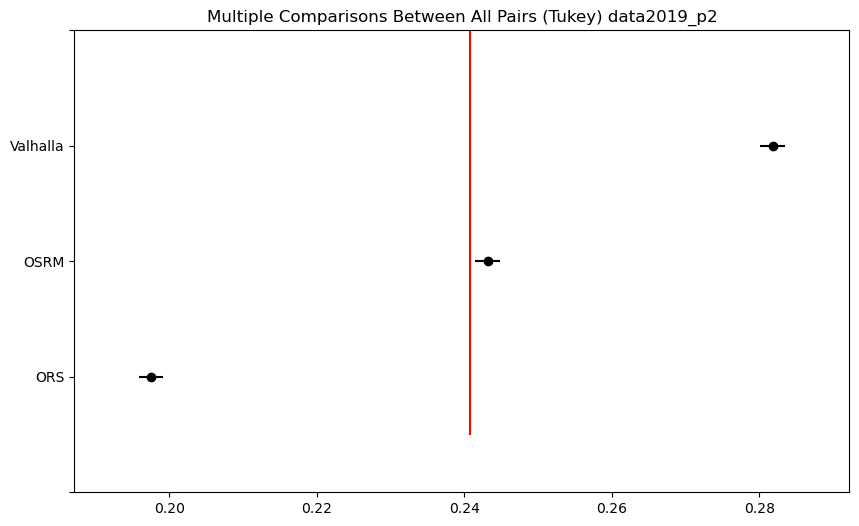

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.134       &      0.0       &     0.1287     &     0.1394     &       True       \\
      ORS       &     Valhalla    &       0.1972      &      0.0       &     0.1918     &     0.2026     &       True       \\
      OSRM      &     Valhalla    &       0.0632      &      0.0       &     0.0578     &     0.0685     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


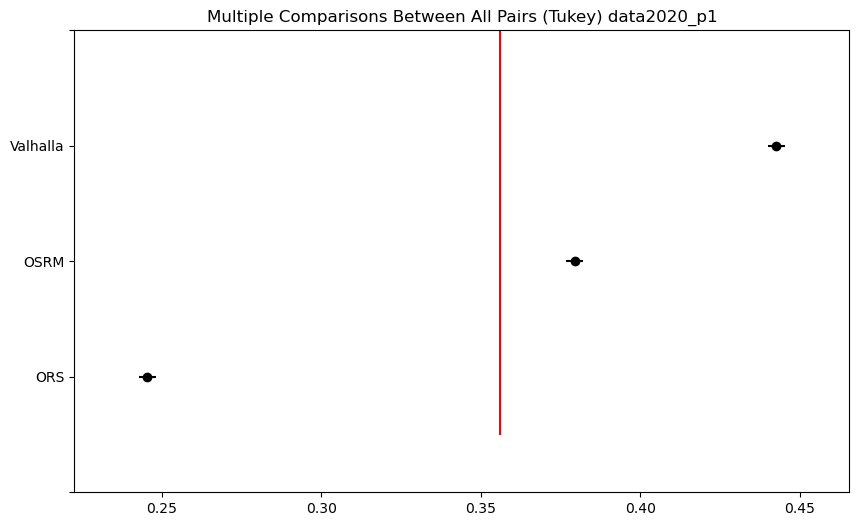

No data for this period
\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1327      &      0.0       &     0.1262     &     0.1391     &       True       \\
      ORS       &     Valhalla    &       0.2454      &      0.0       &     0.2389     &     0.2518     &       True       \\
      OSRM      &     Valhalla    &       0.1127      &      0.0       &     0.1063     &     0.1192     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


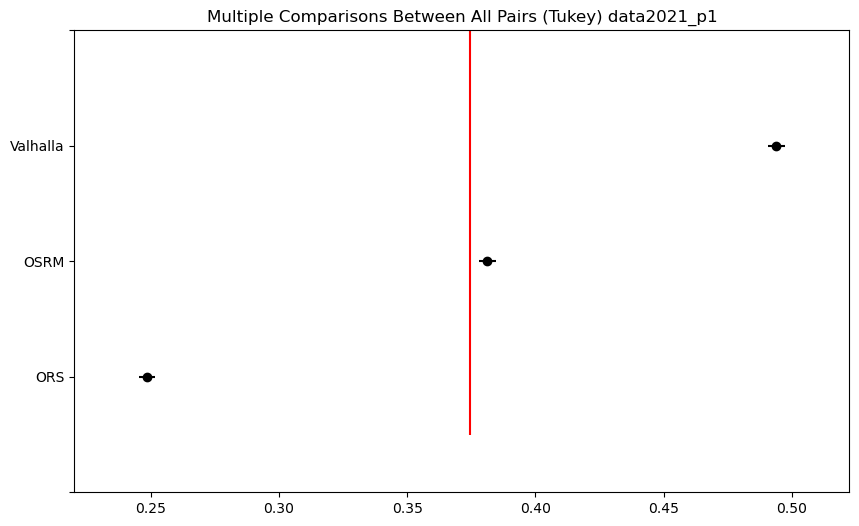

No data for this period
\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.427       &      0.0       &     0.4187     &     0.4353     &       True       \\
      ORS       &     Valhalla    &       0.8134      &      0.0       &     0.8051     &     0.8217     &       True       \\
      OSRM      &     Valhalla    &       0.3864      &      0.0       &     0.3781     &     0.3947     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


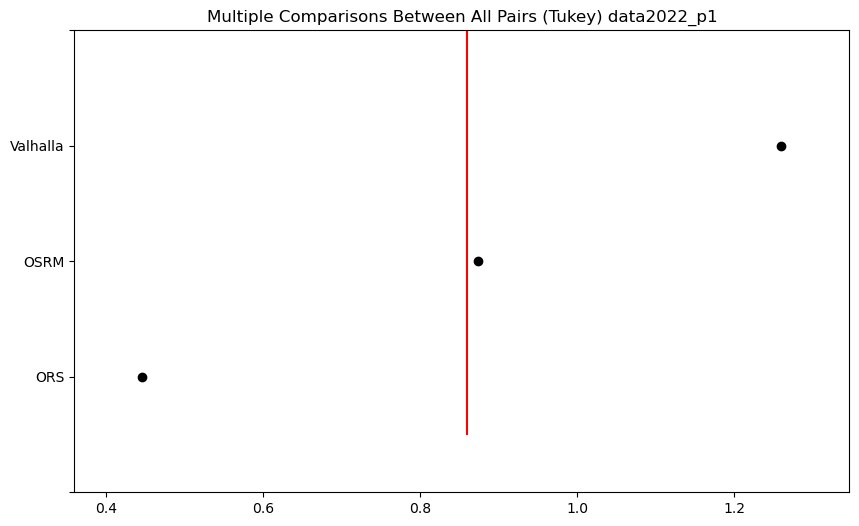

No data for this period
\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.3825      &      0.0       &     0.3771     &     0.3879     &       True       \\
      ORS       &     Valhalla    &       0.4329      &      0.0       &     0.4276     &     0.4383     &       True       \\
      OSRM      &     Valhalla    &       0.0505      &      0.0       &     0.0451     &     0.0558     &       True       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}


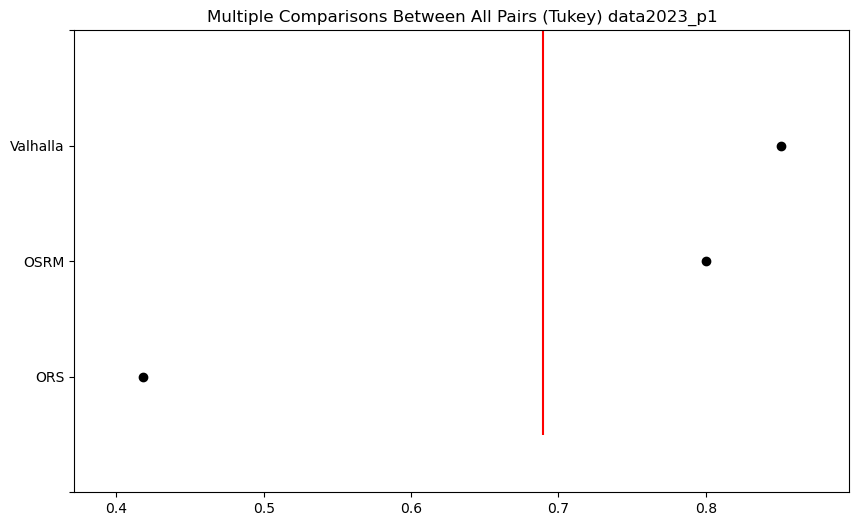

No data for this period
data2013_p1
\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.1758      &     0.2074     &    -0.0694     &     0.4211     &      False       \\
      ORS       &     Valhalla    &       0.1558      &     0.289      &    -0.0895     &     0.4011     &      False       \\
      OSRM      &     Valhalla    &       -0.02       &     0.9793     &    -0.2653     &     0.2252     &      False       \\
\bottomrule
\end{tabular}
%\caption{Multiple Comparison of Means - Tukey HSD, FWER=0.05}
\end{center}
data2013_p2
\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{group1} & \textbf{group2} & \textbf{meandiff} & \textbf{p-adj} & \textbf{lower} & \textbf{upper} & \textbf{reject}  \\
\midrule
      ORS       &       OSRM      &       0.2498      &      0.0       &     0.2363     &     0.263

In [48]:
import statsmodels.stats.multicomp as multi
import pandas as pd
import matplotlib.pyplot as plt

all_results = []
def tuckeyTest(*data, groups,filename):
    # Put data into dataframe
    df = pd.DataFrame()
    if len(data) == 2:
        print ("Tuckey test requires more than two data sources")
    elif len(data) == 3:
        df[ groups[0] ] = data[0]
        df[ groups[1] ] = data[1]
        df[ groups[2] ] = data[2]
    elif len(data) == 4:
        df[ groups[0] ] = data[0]
        df[ groups[1] ] = data[1]
        df[ groups[2] ] = data[2]
        df[ groups[3] ] = data[3]
    #Python Way
    # Stack the data (and rename columns):
    stacked_data = df.stack().reset_index()
    stacked_data = stacked_data.rename(columns={'level_0': 'id','level_1': 'treatment',0:'result'})
    # Show the stacked data:
    #print (stacked_data)
    # Show all pair-wise comparisons:
    res2 = multi.pairwise_tukeyhsd (stacked_data['result'], stacked_data['treatment'])
    print(res2._results_table.as_latex_tabular())
    all_results.append(res2._results_table.as_latex_tabular())
    # plot Simultaneous Confidence Intervals
    res2.plot_simultaneous()
    # if you want to scompute and show the Grand Mean line
    grandMean = stacked_data['result'].values.mean()
    plt.vlines(x=grandMean,ymin=-0.5,ymax=4.5, color="red")
    #if type == "duration":
    #    plt.xlim(0.15,1.3)
    #elif type == "distance":
    #    plt.xlim(100,460)
    plt.title(f"Multiple Comparisons Between All Pairs (Tukey) {filename}")
    plt.savefig(f"Data/Graphs/Duration/tukey_{type}_{filename}.pdf")
    plt.show()
# Prpare data for Tuckey test
#Read your data from file
periods = 2
max_years = 23
type = "duration"
name = "Duration"
#type = "distance"
#name = "Distance"
for x in range(13,max_years+1):
    year = x
    for a in range(1,periods+1):
        filename = f"data20{year}_p{a}"    
        file = f"Data/Graphs/{type}_{filename}.txt"
        df = pd.read_csv(file, sep=",", header=None, names=['ORS','OSRM','Valhalla'])
        if year > 19 and a ==2:
            print("No data for this period")
        else:
            all_results.append(filename)
            tuckeyTest(df['ORS'], df['OSRM'], df['Valhalla'], groups = ['ORS','OSRM','Valhalla'],filename=filename)
with open(f"Data/Graphs/Duration/{name}_tukey_result.txt",'w', encoding="utf-8") as f:
    for item in all_results:
        print(item)
        f.write(str(item)+"\n")